In [1]:
# Importing libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import datetime
import plotly.graph_objects as go
import matplotlib.ticker as ticker
import plotly.express as px
import folium
import missingno as msno
%matplotlib inline

import datetime as dt
from datetime import timedelta

import sklearn
from sklearn import datasets, linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
lc = LabelEncoder()

import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split, cross_val_score, RepeatedKFold, GridSearchCV
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error,mean_absolute_percentage_error

from sklearn.pipeline import make_pipeline, Pipeline

from numpy import arange
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import LassoCV, LinearRegression
from sklearn.linear_model import RidgeCV

from sklearn import tree
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz, plot_tree
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import plot_confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import roc_curve, roc_auc_score, plot_roc_curve


# Trick to widen the screen
from IPython.core.display import display, HTML

#Widens the code landscape 
display(HTML("<style>.container { width:95% !important; }</style>"))

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows', 50)
sns.set_style('whitegrid')

/var/folders/rd/1zzxvt0j0zz6gllbvm245hh40000gn/T/ipykernel_5100/4092586764.py:49: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:
# Reading the dataset
data = pd.read_excel("../data/external/StateAndCategory.xlsx")

In [3]:
# Looking at the first 10 lines of the dataset 
data.head(10).T

,0,1,2,3,4,5,6,7,8,9
Date,2019-10-06,2019-10-13,2019-10-20,2019-10-27,2019-11-03,2019-11-10,2019-11-17,2019-11-24,2019-12-01,2019-12-08
State,Alabama,Alabama,Alabama,Alabama,Alabama,Alabama,Alabama,Alabama,Alabama,Alabama
Category,Alcohol,Alcohol,Alcohol,Alcohol,Alcohol,Alcohol,Alcohol,Alcohol,Alcohol,Alcohol
Dollars,23611285.0,23220758.0,21770283.0,21956558.0,23183482.0,22305042.0,21752827.0,22163189.0,27789778.0,20495494.0
Unit sales,2974221.0,2895573.0,2730939.0,2764970.0,2872683.0,2787906.0,2715427.0,2765197.0,3220147.0,2592792.0
Volume sales,837930.0,830131.0,762832.0,768366.0,815352.0,768645.0,753569.0,752851.0,960289.0,705014.0
Dollars last year,22449300.0,23314625.0,21070374.0,20188919.0,22565261.0,19889222.0,20079479.0,23787504.0,19623984.0,18933844.0
Unit sales last year,2979065.0,2978312.0,2745973.0,2651957.0,2884813.0,2636924.0,2605810.0,2900939.0,2533266.0,2426579.0
Volume sales last year,815637.0,855363.0,766339.0,713812.0,801717.0,693984.0,681261.0,805853.0,692656.0,652126.0
Dollars 3 years ago,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Looking at the last 10 lines of the dataset
data.tail(10).T

,79458,79459,79460,79461,79462,79463,79464,79465,79466,79467
Date,2022-11-13,2022-11-20,2022-11-27,2022-12-04,2022-12-11,2022-12-18,NA = data are not available,Note: The series is subject to revision based ...,"Source: USDA, Economic Research Service calcul...","Data as of December 18, 2022."
State,Wyoming,Wyoming,Wyoming,Wyoming,Wyoming,Wyoming,NaN,NaN,NaN,NaN
Category,Vegetables,Vegetables,Vegetables,Vegetables,Vegetables,Vegetables,NaN,NaN,NaN,NaN
Dollars,2303044.0,2602811.0,2479794.0,2100624.0,2251063.0,2348132.0,NaN,NaN,NaN,NaN
Unit sales,1048156.0,1173843.0,1103847.0,936969.0,999933.0,1035860.0,NaN,NaN,NaN,NaN
Volume sales,1702140.0,1913963.0,1738002.0,1432632.0,1542023.0,1692035.0,NaN,NaN,NaN,NaN
Dollars last year,2125903.0,2397439.0,2225316.0,1978026.0,2083215.0,2162981.0,NaN,NaN,NaN,NaN
Unit sales last year,1068511.0,1180841.0,1090546.0,969229.0,1031045.0,1055737.0,NaN,NaN,NaN,NaN
Volume sales last year,1739792.0,1937009.0,1725419.0,1498999.0,1627223.0,1697209.0,NaN,NaN,NaN,NaN
Dollars 3 years ago,1961060.0,2257197.0,2219431.0,1811746.0,1861573.0,2323511.0,NaN,NaN,NaN,NaN


In [5]:
# Removing the last 4 entries because they are just informational
data.drop(data.tail(4).index,
        inplace = True)
data.tail()

,Date,State,Category,Dollars,Unit sales,Volume sales,Dollars last year,Unit sales last year,Volume sales last year,Dollars 3 years ago,Unit sales 3 years ago,Volume sales 3 years ago,Percent change dollars 1 year,Percent change units 1 year,Percent change volume 1 year,Percent change dollars 3 years,Percent change units 3 years,Percent change volume 3 years
79459,2022-11-20,Wyoming,Vegetables,2602811.0,1173843.0,1913963.0,2397439.0,1180841.0,1937009.0,2257197.0,1207337.0,2049575.0,8.6,-0.6,-1.2,15.3,-2.8,-6.6
79460,2022-11-27,Wyoming,Vegetables,2479794.0,1103847.0,1738002.0,2225316.0,1090546.0,1725419.0,2219431.0,1188227.0,1997316.0,11.4,1.2,0.7,11.7,-7.1,-13.0
79461,2022-12-04,Wyoming,Vegetables,2100624.0,936969.0,1432632.0,1978026.0,969229.0,1498999.0,1811746.0,965439.0,1614865.0,6.2,-3.3,-4.4,15.9,-2.9,-11.3
79462,2022-12-11,Wyoming,Vegetables,2251063.0,999933.0,1542023.0,2083215.0,1031045.0,1627223.0,1861573.0,988900.0,1619299.0,8.1,-3.0,-5.2,20.9,1.1,-4.8
79463,2022-12-18,Wyoming,Vegetables,2348132.0,1035860.0,1692035.0,2162981.0,1055737.0,1697209.0,2323511.0,1179534.0,1959064.0,8.6,-1.9,-0.3,1.1,-12.2,-13.6


In [6]:
# Looking at some of the information 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79464 entries, 0 to 79463
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Date                            79464 non-null  object 
 1   State                           79464 non-null  object 
 2   Category                        79464 non-null  object 
 3   Dollars                         79464 non-null  float64
 4   Unit sales                      79458 non-null  float64
 5   Volume sales                    72240 non-null  float64
 6   Dollars last year               79187 non-null  float64
 7   Unit sales last year            79179 non-null  float64
 8   Volume sales last year          71988 non-null  float64
 9   Dollars 3 years ago             29996 non-null  float64
 10  Unit sales 3 years ago          29995 non-null  float64
 11  Volume sales 3 years ago        27269 non-null  float64
 12  Percent change dollars 1 year   

In [7]:
data.describe()

,Dollars,Unit sales,Volume sales,Dollars last year,Unit sales last year,Volume sales last year,Dollars 3 years ago,Unit sales 3 years ago,Volume sales 3 years ago,Percent change dollars 1 year,Percent change units 1 year,Percent change volume 1 year,Percent change dollars 3 years,Percent change units 3 years,Percent change volume 3 years
count,7.946400e+04,7.945800e+04,7.224000e+04,7.918700e+04,7.917900e+04,7.198800e+04,2.999600e+04,2.999500e+04,2.726900e+04,79187.000000,79179.000000,71988.000000,29996.000000,29989.000000,27269.00000
mean,3.004220e+07,9.285564e+06,4.346782e+07,2.806284e+07,9.271008e+06,4.261446e+07,2.596150e+07,9.021098e+06,4.024885e+07,7.903934,1.331560,1.585343,23.209221,2.338121,2.87631
std,4.770448e+07,1.510421e+07,1.315261e+08,4.438617e+07,1.509662e+07,1.283242e+08,4.122033e+07,1.480536e+07,1.203044e+08,14.906693,14.578056,16.102667,14.995531,14.386263,16.62808
min,4.941600e+04,4.437000e+03,9.650000e+02,5.002700e+04,4.437000e+03,9.990000e+02,5.002700e+04,4.585000e+03,1.004000e+03,-63.600000,-67.400000,-64.600000,-43.300000,-48.800000,-46.40000
25%,4.396122e+06,1.110472e+06,1.676684e+06,4.121482e+06,1.099937e+06,1.682662e+06,3.813584e+06,1.057744e+06,1.629940e+06,1.000000,-4.700000,-5.700000,15.700000,-3.900000,-4.80000
50%,1.348743e+07,4.212998e+06,6.514509e+06,1.265726e+07,4.191513e+06,6.490956e+06,1.176354e+07,4.070996e+06,6.272329e+06,7.100000,-0.600000,-0.400000,22.600000,1.100000,1.10000
75%,3.537329e+07,1.068737e+07,2.410544e+07,3.320676e+07,1.061359e+07,2.404990e+07,3.062670e+07,1.021851e+07,2.322585e+07,13.300000,5.400000,6.900000,29.825000,6.700000,8.30000
max,6.452044e+08,2.225147e+08,1.730773e+09,6.450795e+08,2.224711e+08,1.730773e+09,4.429971e+08,1.571063e+08,1.569918e+09,880.600000,931.400000,1250.000000,823.600000,828.600000,1081.30000


# EDA

In [8]:
# Making a copy of the dataset
df = data.copy()

df['Dollars_Converted'] = df['Dollars'].replace(',', '')
df['Dollars_Converted'] = df['Dollars_Converted'].replace('$', '')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79464 entries, 0 to 79463
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Date                            79464 non-null  object 
 1   State                           79464 non-null  object 
 2   Category                        79464 non-null  object 
 3   Dollars                         79464 non-null  float64
 4   Unit sales                      79458 non-null  float64
 5   Volume sales                    72240 non-null  float64
 6   Dollars last year               79187 non-null  float64
 7   Unit sales last year            79179 non-null  float64
 8   Volume sales last year          71988 non-null  float64
 9   Dollars 3 years ago             29996 non-null  float64
 10  Unit sales 3 years ago          29995 non-null  float64
 11  Volume sales 3 years ago        27269 non-null  float64
 12  Percent change dollars 1 year   

In [9]:
df['Unit_Converted'] = df['Unit sales'].replace(',', '')

df['Unit_Converted']= df['Unit_Converted'].astype(float)
df['Dollars_Converted'] = df['Dollars_Converted'].astype(float)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79464 entries, 0 to 79463
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Date                            79464 non-null  object 
 1   State                           79464 non-null  object 
 2   Category                        79464 non-null  object 
 3   Dollars                         79464 non-null  float64
 4   Unit sales                      79458 non-null  float64
 5   Volume sales                    72240 non-null  float64
 6   Dollars last year               79187 non-null  float64
 7   Unit sales last year            79179 non-null  float64
 8   Volume sales last year          71988 non-null  float64
 9   Dollars 3 years ago             29996 non-null  float64
 10  Unit sales 3 years ago          29995 non-null  float64
 11  Volume sales 3 years ago        27269 non-null  float64
 12  Percent change dollars 1 year   

In [10]:
df['Price_per_Unit'] = (df['Dollars_Converted'] / df['Unit_Converted'])
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
Date,2019-10-06,2019-10-13,2019-10-20,2019-10-27,2019-11-03,2019-11-10,2019-11-17,2019-11-24,2019-12-01,2019-12-08
State,Alabama,Alabama,Alabama,Alabama,Alabama,Alabama,Alabama,Alabama,Alabama,Alabama
Category,Alcohol,Alcohol,Alcohol,Alcohol,Alcohol,Alcohol,Alcohol,Alcohol,Alcohol,Alcohol
Dollars,23611285.0,23220758.0,21770283.0,21956558.0,23183482.0,22305042.0,21752827.0,22163189.0,27789778.0,20495494.0
Unit sales,2974221.0,2895573.0,2730939.0,2764970.0,2872683.0,2787906.0,2715427.0,2765197.0,3220147.0,2592792.0
Volume sales,837930.0,830131.0,762832.0,768366.0,815352.0,768645.0,753569.0,752851.0,960289.0,705014.0
Dollars last year,22449300.0,23314625.0,21070374.0,20188919.0,22565261.0,19889222.0,20079479.0,23787504.0,19623984.0,18933844.0
Unit sales last year,2979065.0,2978312.0,2745973.0,2651957.0,2884813.0,2636924.0,2605810.0,2900939.0,2533266.0,2426579.0
Volume sales last year,815637.0,855363.0,766339.0,713812.0,801717.0,693984.0,681261.0,805853.0,692656.0,652126.0
Dollars 3 years ago,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


    Although this information is highly useful, in order to identify pricing trends, we must view it from the standpoint of pricing the individual units. 

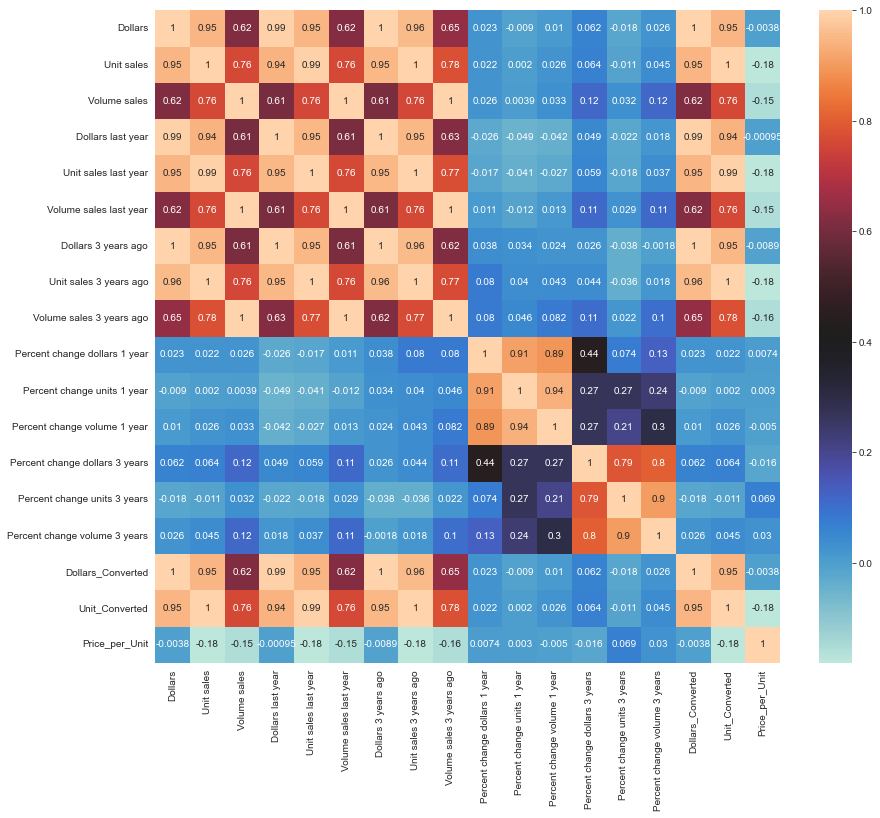

In [11]:
# The Correlation Heatmap
fig = plt.figure(figsize= (14,12))
sns.heatmap(df.corr(),cmap="icefire", annot=True)
plt.show()

In [12]:
# Identify the pairs that has a correlation of more than 0.5 in absolute value.
corr_matrix = df.corr().abs()
threshold_corr = corr_matrix[corr_matrix > 0.50]
threshold_corr

,Dollars,Unit sales,Volume sales,Dollars last year,Unit sales last year,Volume sales last year,Dollars 3 years ago,Unit sales 3 years ago,Volume sales 3 years ago,Percent change dollars 1 year,Percent change units 1 year,Percent change volume 1 year,Percent change dollars 3 years,Percent change units 3 years,Percent change volume 3 years,Dollars_Converted,Unit_Converted,Price_per_Unit
Dollars,1.000000,0.949173,0.621143,0.993370,0.946436,0.622506,0.996091,0.956567,0.648916,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.949173,NaN
Unit sales,0.949173,1.000000,0.763699,0.942555,0.993841,0.762222,0.951292,0.996962,0.778305,NaN,NaN,NaN,NaN,NaN,NaN,0.949173,1.000000,NaN
Volume sales,0.621143,0.763699,1.000000,0.606055,0.757280,0.995916,0.609029,0.760008,0.996509,NaN,NaN,NaN,NaN,NaN,NaN,0.621143,0.763699,NaN
Dollars last year,0.993370,0.942555,0.606055,1.000000,0.950264,0.612423,0.996702,0.950017,0.625361,NaN,NaN,NaN,NaN,NaN,NaN,0.993370,0.942555,NaN
Unit sales last year,0.946436,0.993841,0.757280,0.950264,1.000000,0.762373,0.951309,0.997209,0.769712,NaN,NaN,NaN,NaN,NaN,NaN,0.946436,0.993841,NaN
Volume sales last year,0.622506,0.762222,0.995916,0.612423,0.762373,1.000000,0.611366,0.762677,0.997076,NaN,NaN,NaN,NaN,NaN,NaN,0.622506,0.762222,NaN
Dollars 3 years ago,0.996091,0.951292,0.609029,0.996702,0.951309,0.611366,1.000000,0.955239,0.618294,NaN,NaN,NaN,NaN,NaN,NaN,0.996091,0.951292,NaN
Unit sales 3 years ago,0.956567,0.996962,0.760008,0.950017,0.997209,0.762677,0.955239,1.000000,0.768829,NaN,NaN,NaN,NaN,NaN,NaN,0.956567,0.996962,NaN
Volume sales 3 years ago,0.648916,0.778305,0.996509,0.625361,0.769712,0.997076,0.618294,0.768829,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.648916,0.778305,NaN
Percent change dollars 1 year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.908295,0.892522,NaN,NaN,NaN,NaN,NaN,NaN


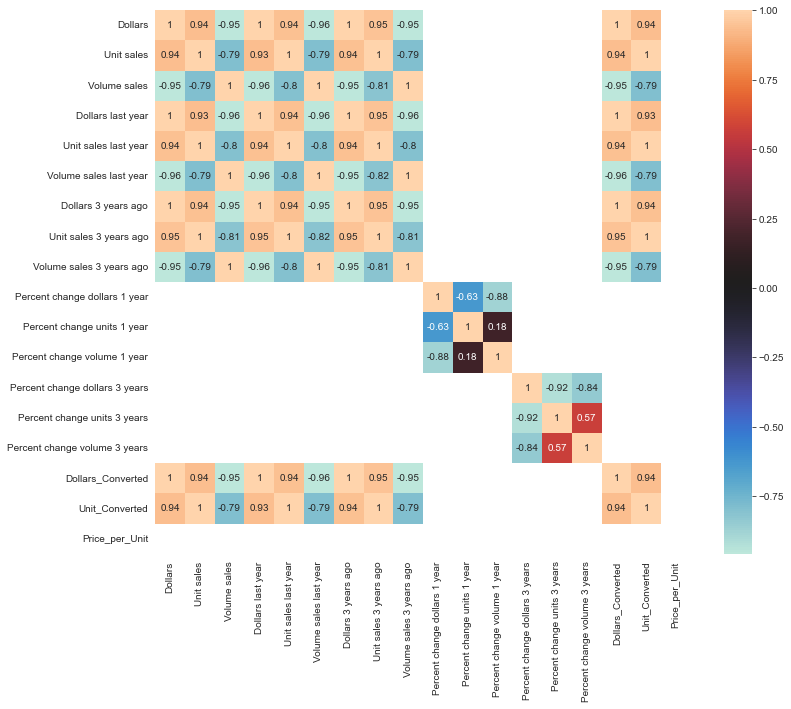

In [13]:
# The Correlation Heatmap of more than 0.5 in absolute value.
fig = plt.figure(figsize= (12,10))
sns.heatmap(threshold_corr.corr(),cmap="icefire", annot=True)
plt.show()

In [14]:
#The numeric variables 
num_cols = [col for col in data.columns if data[col].dtypes != "O"]

In [15]:
# For loop using numeric variables to display a boxplot
def graphs(dataframe):
    
    for col in num_cols:
        
        sns.boxplot(x= data[col]);
        
        plt.show()

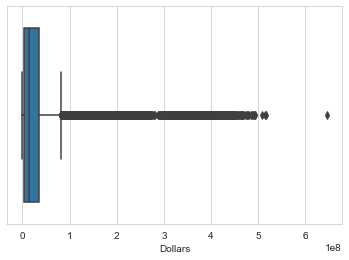

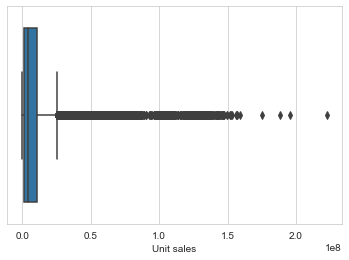

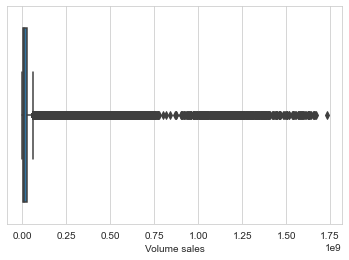

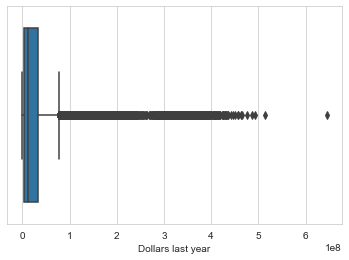

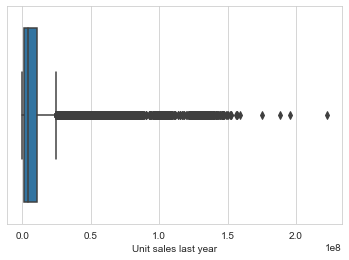

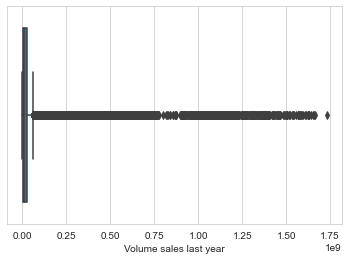

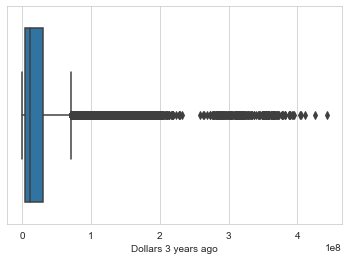

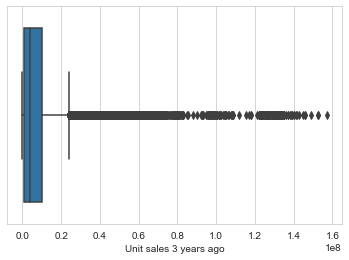

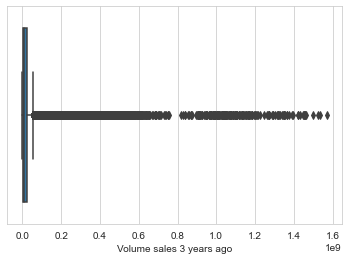

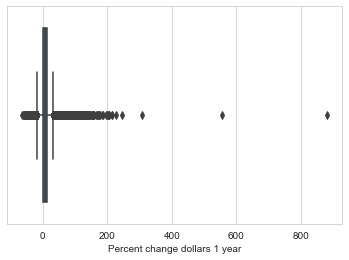

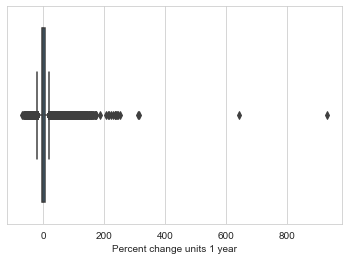

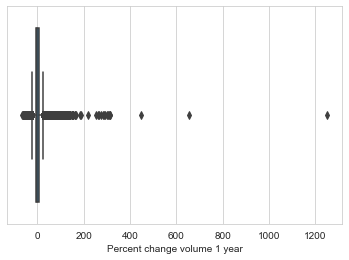

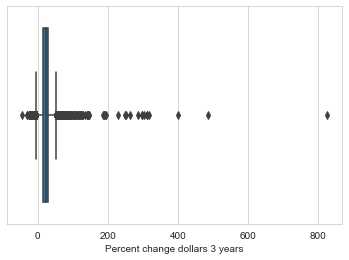

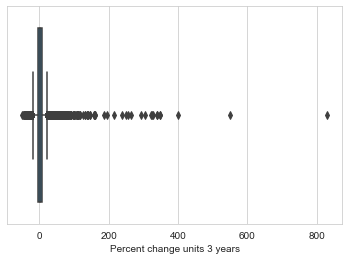

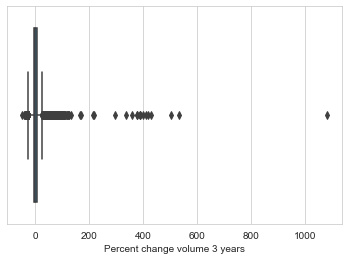

In [16]:
graphs(data)

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

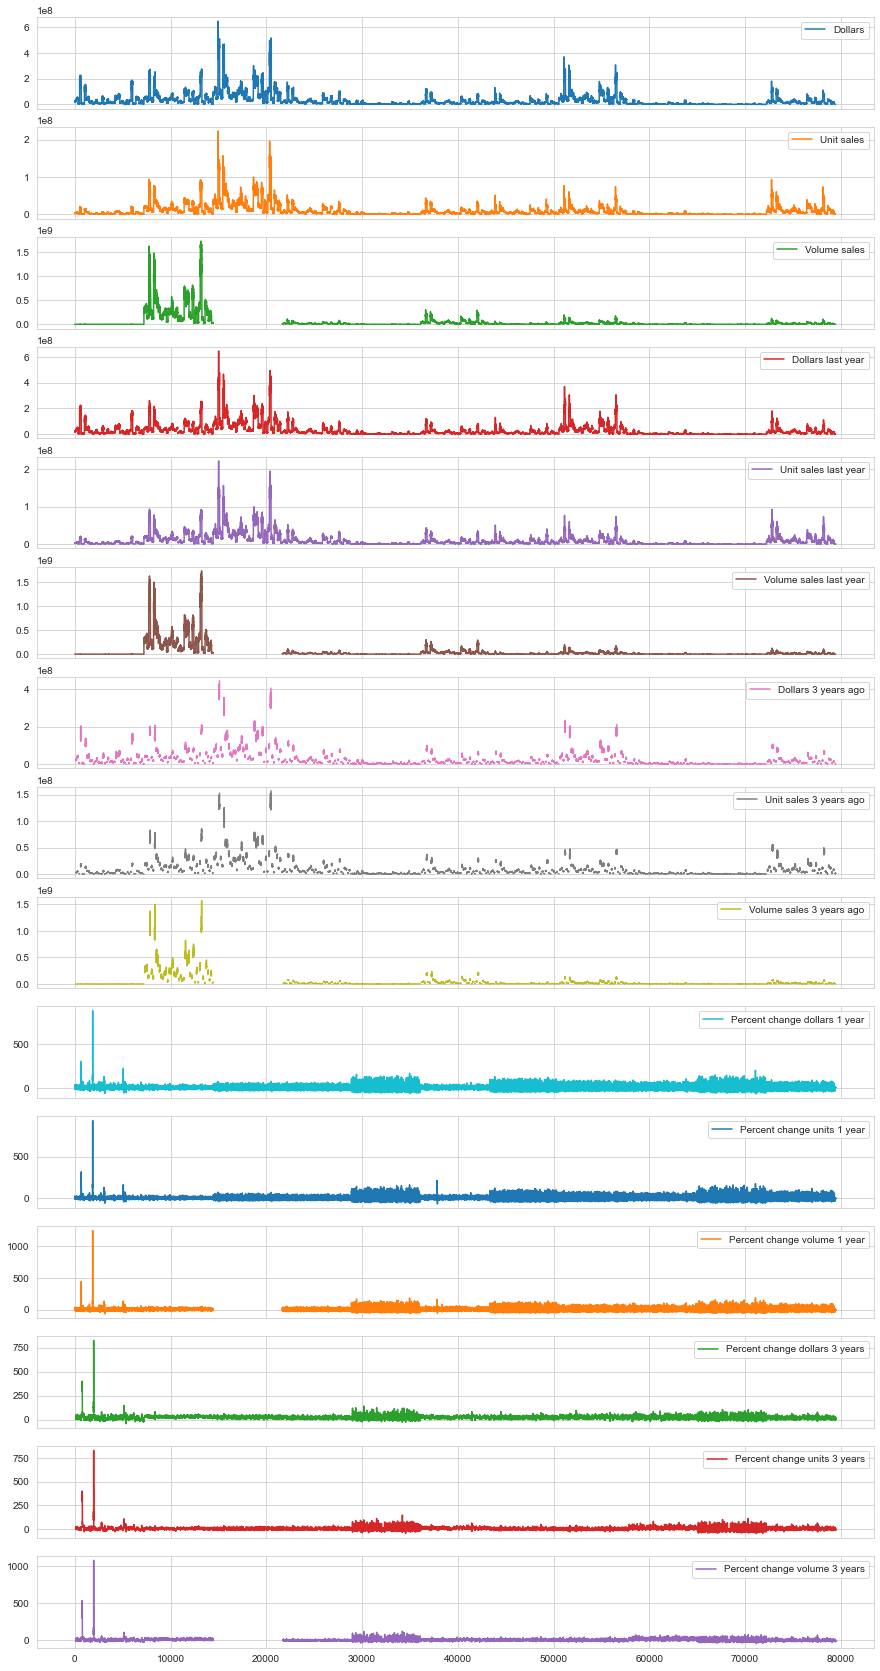

In [17]:
data.plot(subplots=True, grid=True, figsize=(15,30))

After looking at the plots above, I can see that all the plots after the percent change dollars 1 year there isn't much difference in most of the graphs so I would probably not the these variables for any futher analysis. 

In [18]:
# Looking at the value counts of Catergory variable
data.Category.value_counts()

Alcohol                        7224
Beverages                      7224
Commercially prepared items    7224
Dairy                          7224
Fats and oils                  7224
Fruits                         7224
Grains                         7224
Meats, eggs, and nuts          7224
Other                          7224
Sugar and sweeteners           7224
Vegetables                     7224
Name: Category, dtype: int64

In [19]:
# Efficient way to extract year from string format date
df_2020 = df.loc[df['Date'].str.contains('2020', case = False)]
df_2021 = df.loc[df['Date'].str.contains('2021', case = False)]
df_2022 = df.loc[df['Date'].str.contains('2022', case = False)]
df_2023 = df.loc[df['Date'].str.contains('2023', case = False)]

<AxesSubplot:xlabel='Date', ylabel='Price_per_Unit'>

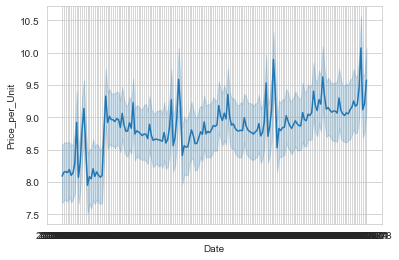

In [20]:
df_Alcohol = df[(df['Category'] == 'Alcohol')]
sns.lineplot(data = df_Alcohol, x = "Date", y = "Price_per_Unit")

<AxesSubplot:xlabel='Date', ylabel='Price_per_Unit'>

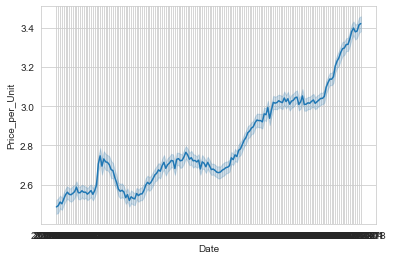

In [21]:
df_Beverages = df[(df['Category'] == 'Beverages')]
sns.lineplot(data = df_Beverages, x = "Date", y = "Price_per_Unit")

<AxesSubplot:xlabel='Date', ylabel='Price_per_Unit'>

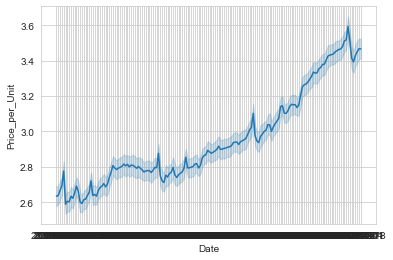

In [22]:
df_Commercial = df[(df['Category'] == 'Commercially prepared items')]
sns.lineplot(data = df_Commercial, x = "Date", y = "Price_per_Unit")

<AxesSubplot:xlabel='Date', ylabel='Price_per_Unit'>

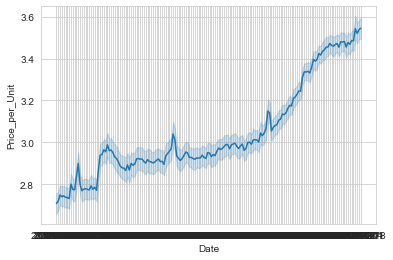

In [23]:
df_Dairy = df[(df['Category'] == 'Dairy')]
sns.lineplot(data = df_Dairy, x = "Date", y = "Price_per_Unit")

<AxesSubplot:xlabel='Date', ylabel='Price_per_Unit'>

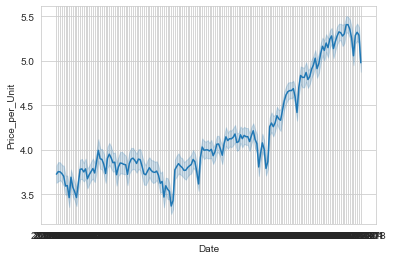

In [24]:
df_Fats_Oil = df[(df['Category'] == 'Fats and oils')]
sns.lineplot(data = df_Fats_Oil, x = "Date", y = "Price_per_Unit")

<AxesSubplot:xlabel='Date', ylabel='Price_per_Unit'>

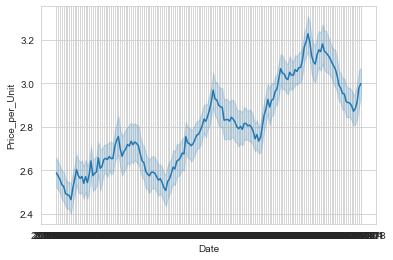

In [25]:
df_Fruit = df[(df['Category'] == 'Fruits')]
sns.lineplot(data = df_Fruit, x = "Date", y = "Price_per_Unit")

<AxesSubplot:xlabel='Date', ylabel='Price_per_Unit'>

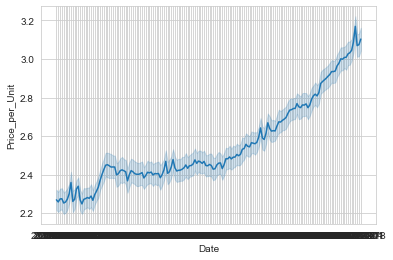

In [26]:
df_Grain = df[(df['Category'] == 'Grains')]
sns.lineplot(data = df_Grain, x = "Date", y = "Price_per_Unit")

<AxesSubplot:xlabel='Date', ylabel='Price_per_Unit'>

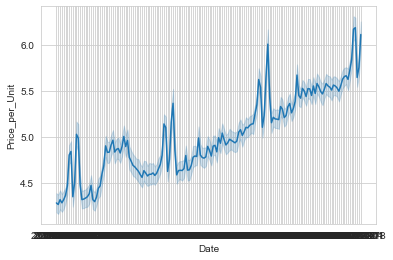

In [27]:
df_Meats_etc = df[(df['Category'] == 'Meats, eggs, and nuts')]
sns.lineplot(data = df_Meats_etc, x = "Date", y = "Price_per_Unit")

<AxesSubplot:xlabel='Date', ylabel='Price_per_Unit'>

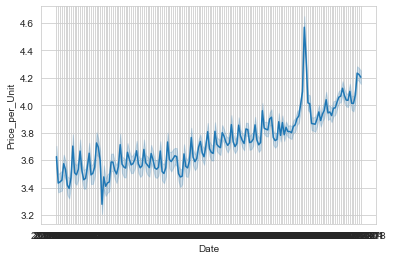

In [28]:
df_Others = df[(df['Category'] == 'Other')]
sns.lineplot(data = df_Others, x = "Date", y = "Price_per_Unit")

<AxesSubplot:xlabel='Date', ylabel='Price_per_Unit'>

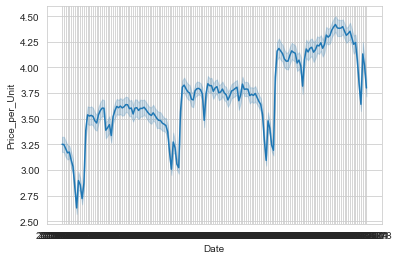

In [29]:
df_Sweetness = df[(df['Category'] == 'Sugar and sweeteners')]
sns.lineplot(data = df_Sweetness, x = "Date", y = "Price_per_Unit")

<AxesSubplot:xlabel='Date', ylabel='Price_per_Unit'>

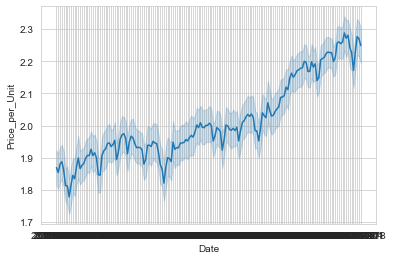

In [30]:
df_Veggies = df[(df['Category'] == 'Vegetables')]
sns.lineplot(data = df_Veggies, x = "Date", y = "Price_per_Unit")

To observe if there is a distinct general pattern of market decline, I believe it would be highly instructive to overlay all of these line charts. Let's plot each year to see if the tendencies continue over time.

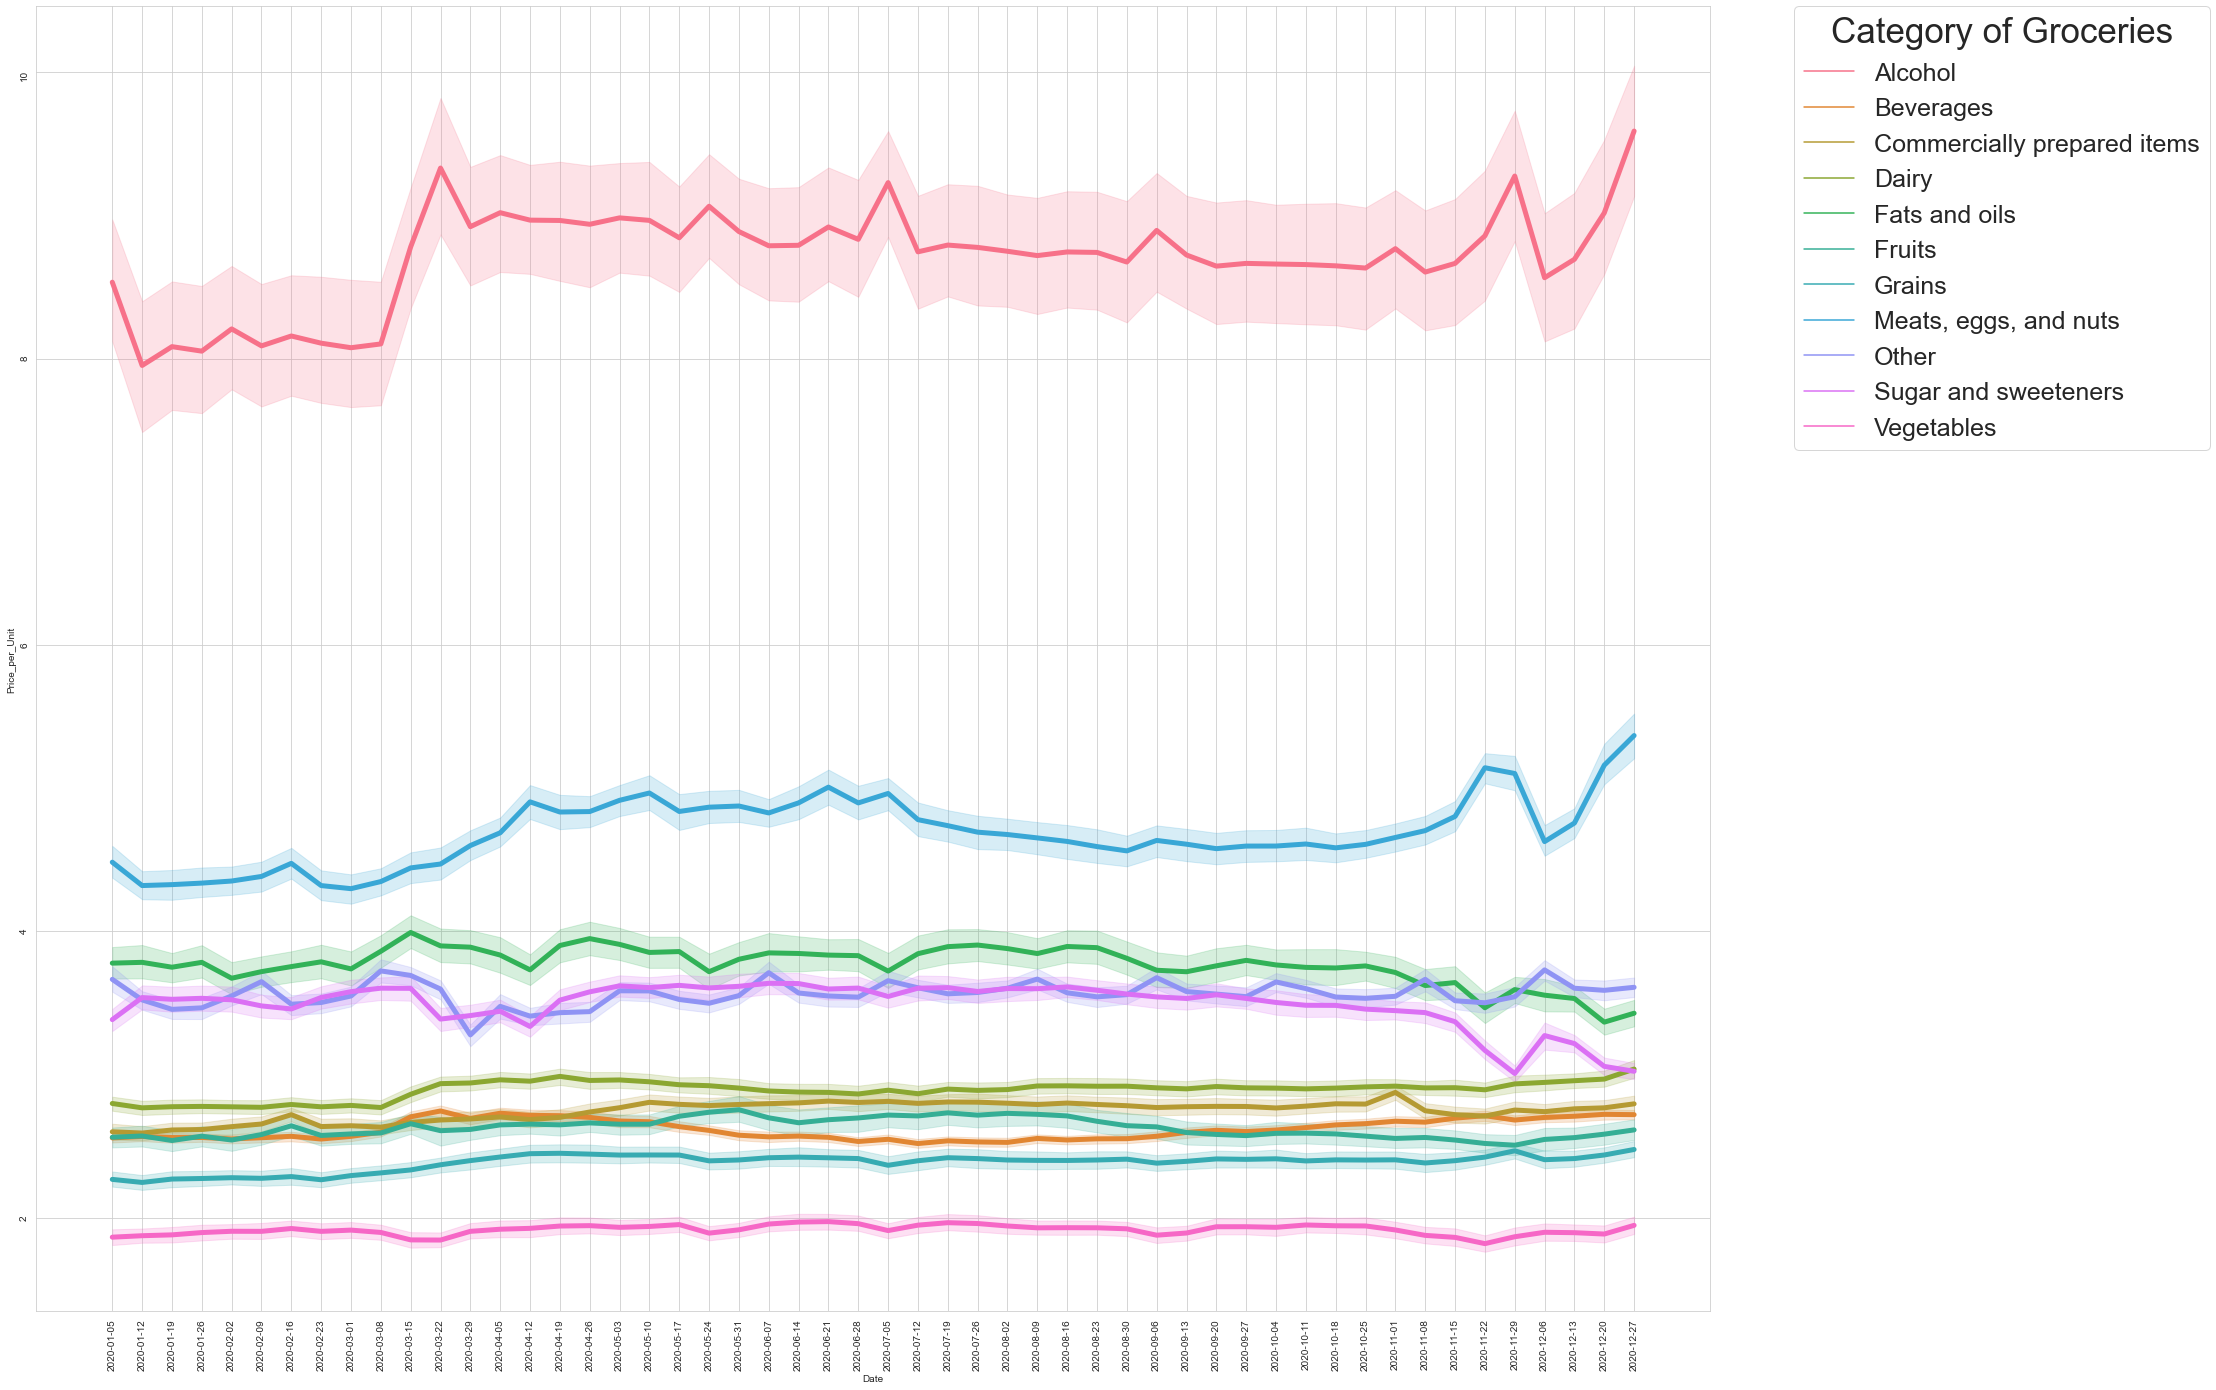

In [31]:
# The year 2020 
fig = plt.figure(figsize= (30,24))
ax = sns.lineplot(data=df_2020, x = "Date", y = "Price_per_Unit", hue = 'Category', lw = 5 )


leg = plt.legend(bbox_to_anchor=(1.05, 1), borderaxespad = 0,
           title = 'Category of Groceries', fontsize = '25', title_fontsize = '35')
leg.get_lines()
ax.tick_params(rotation = 90)
plt.show()

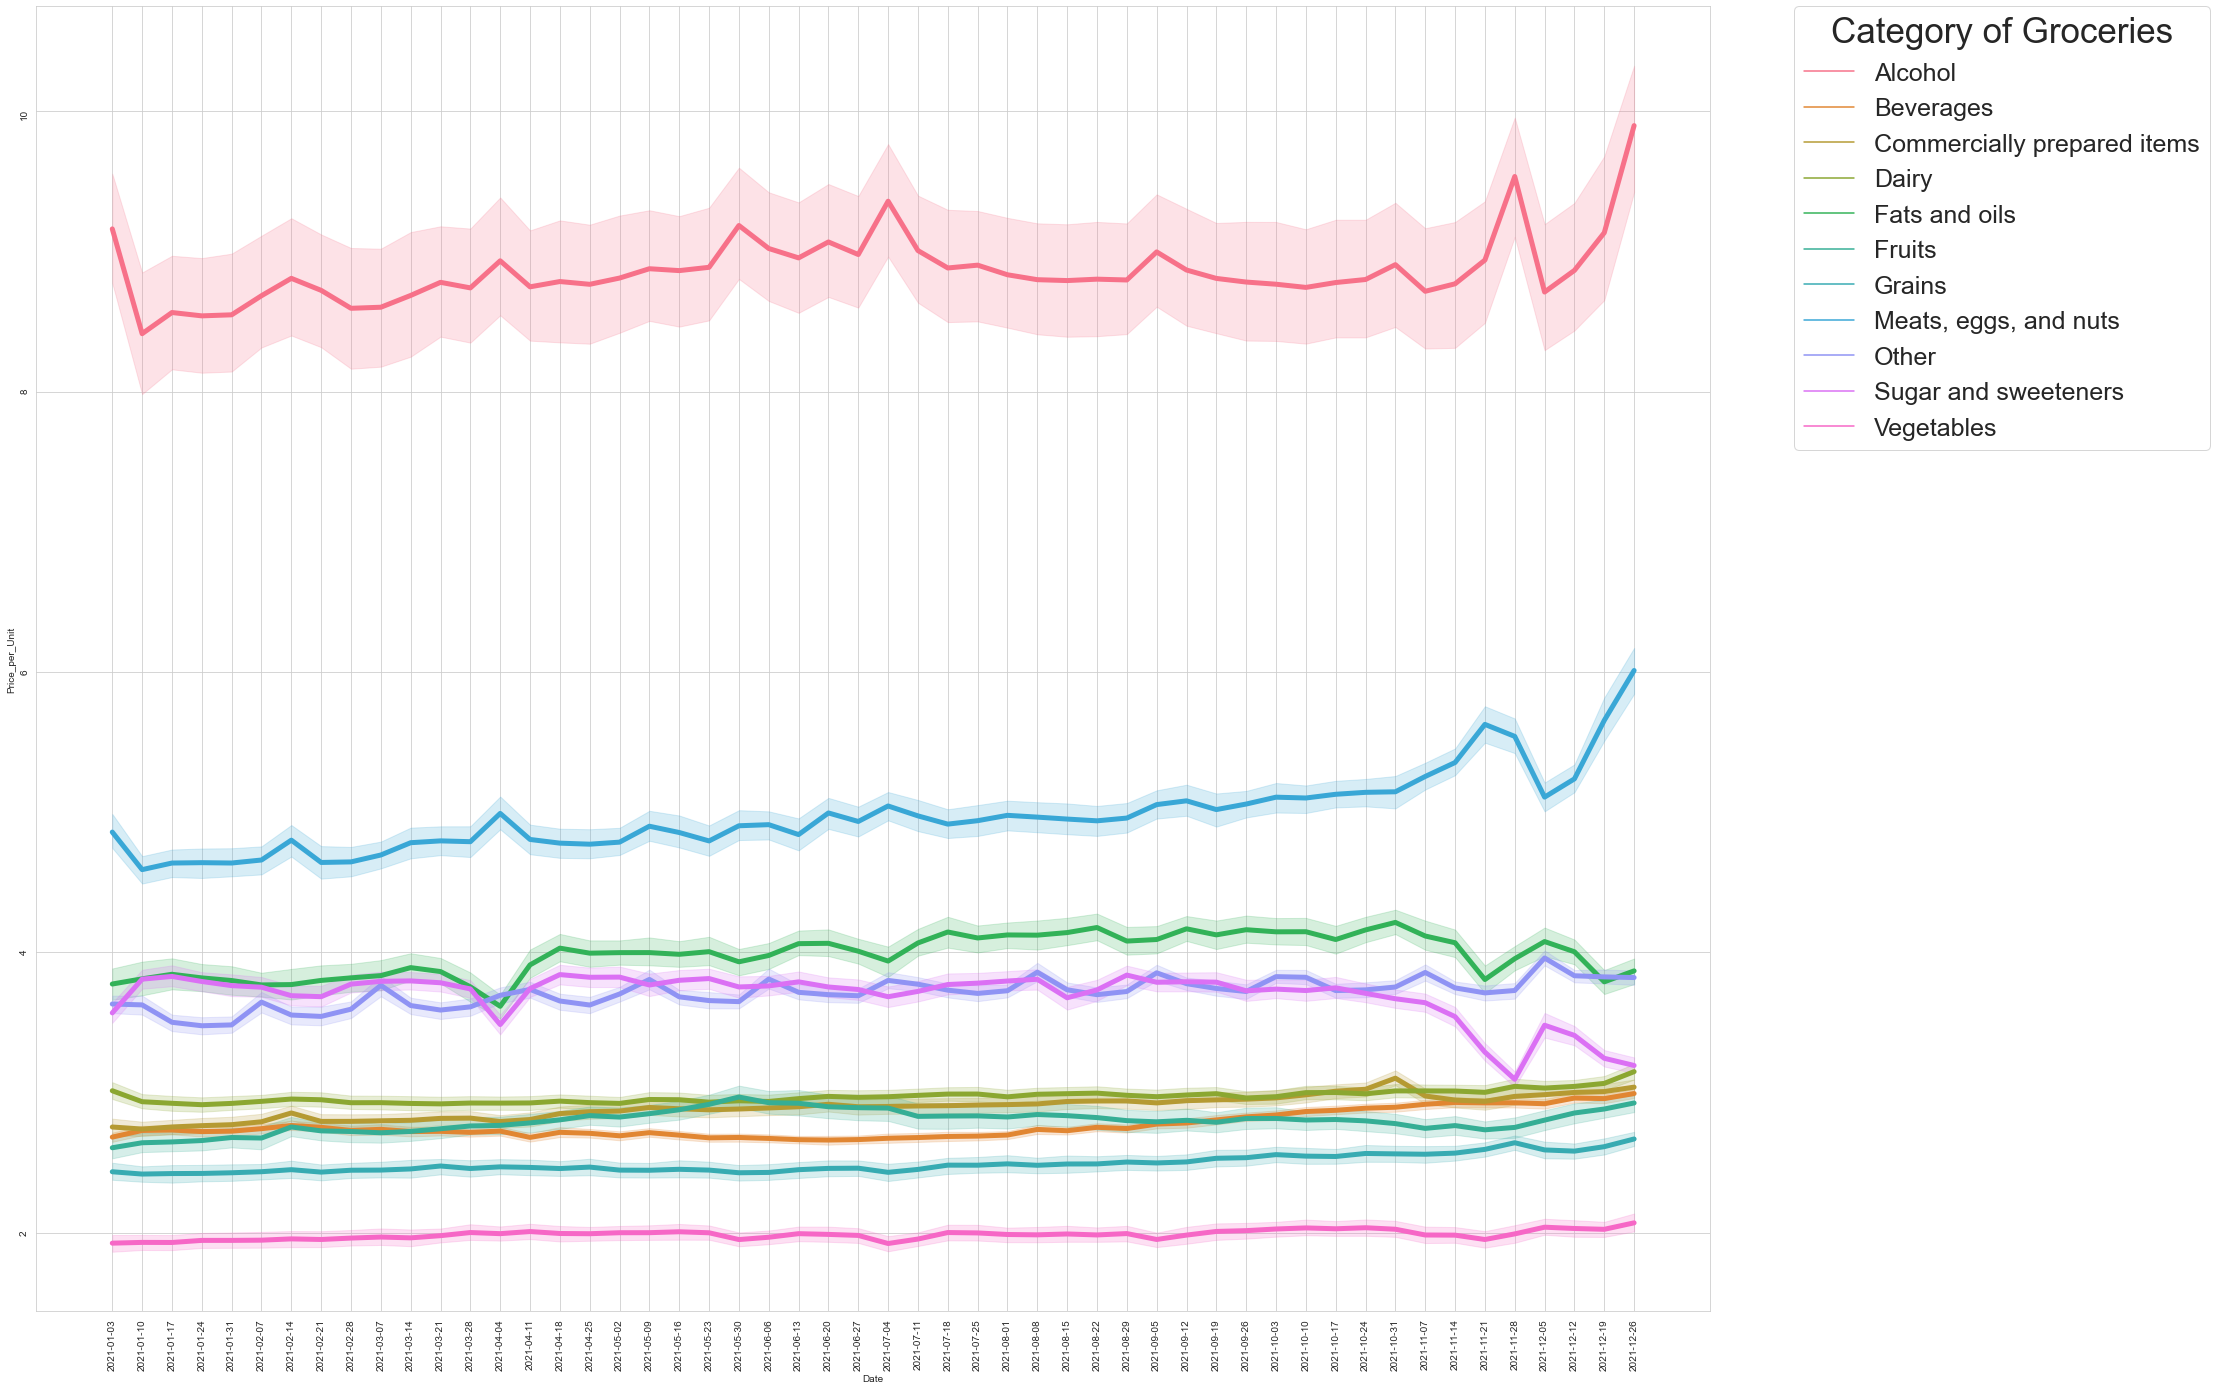

In [32]:
# The year 2021
fig = plt.figure(figsize= (30,24))
ax = sns.lineplot(data=df_2021, x = "Date", y = "Price_per_Unit", hue = 'Category', lw = 5 )


leg = plt.legend(bbox_to_anchor=(1.05, 1), borderaxespad=0,
           title = 'Category of Groceries', fontsize = '25', title_fontsize = '35')

ax.tick_params(rotation = 90)
plt.show()

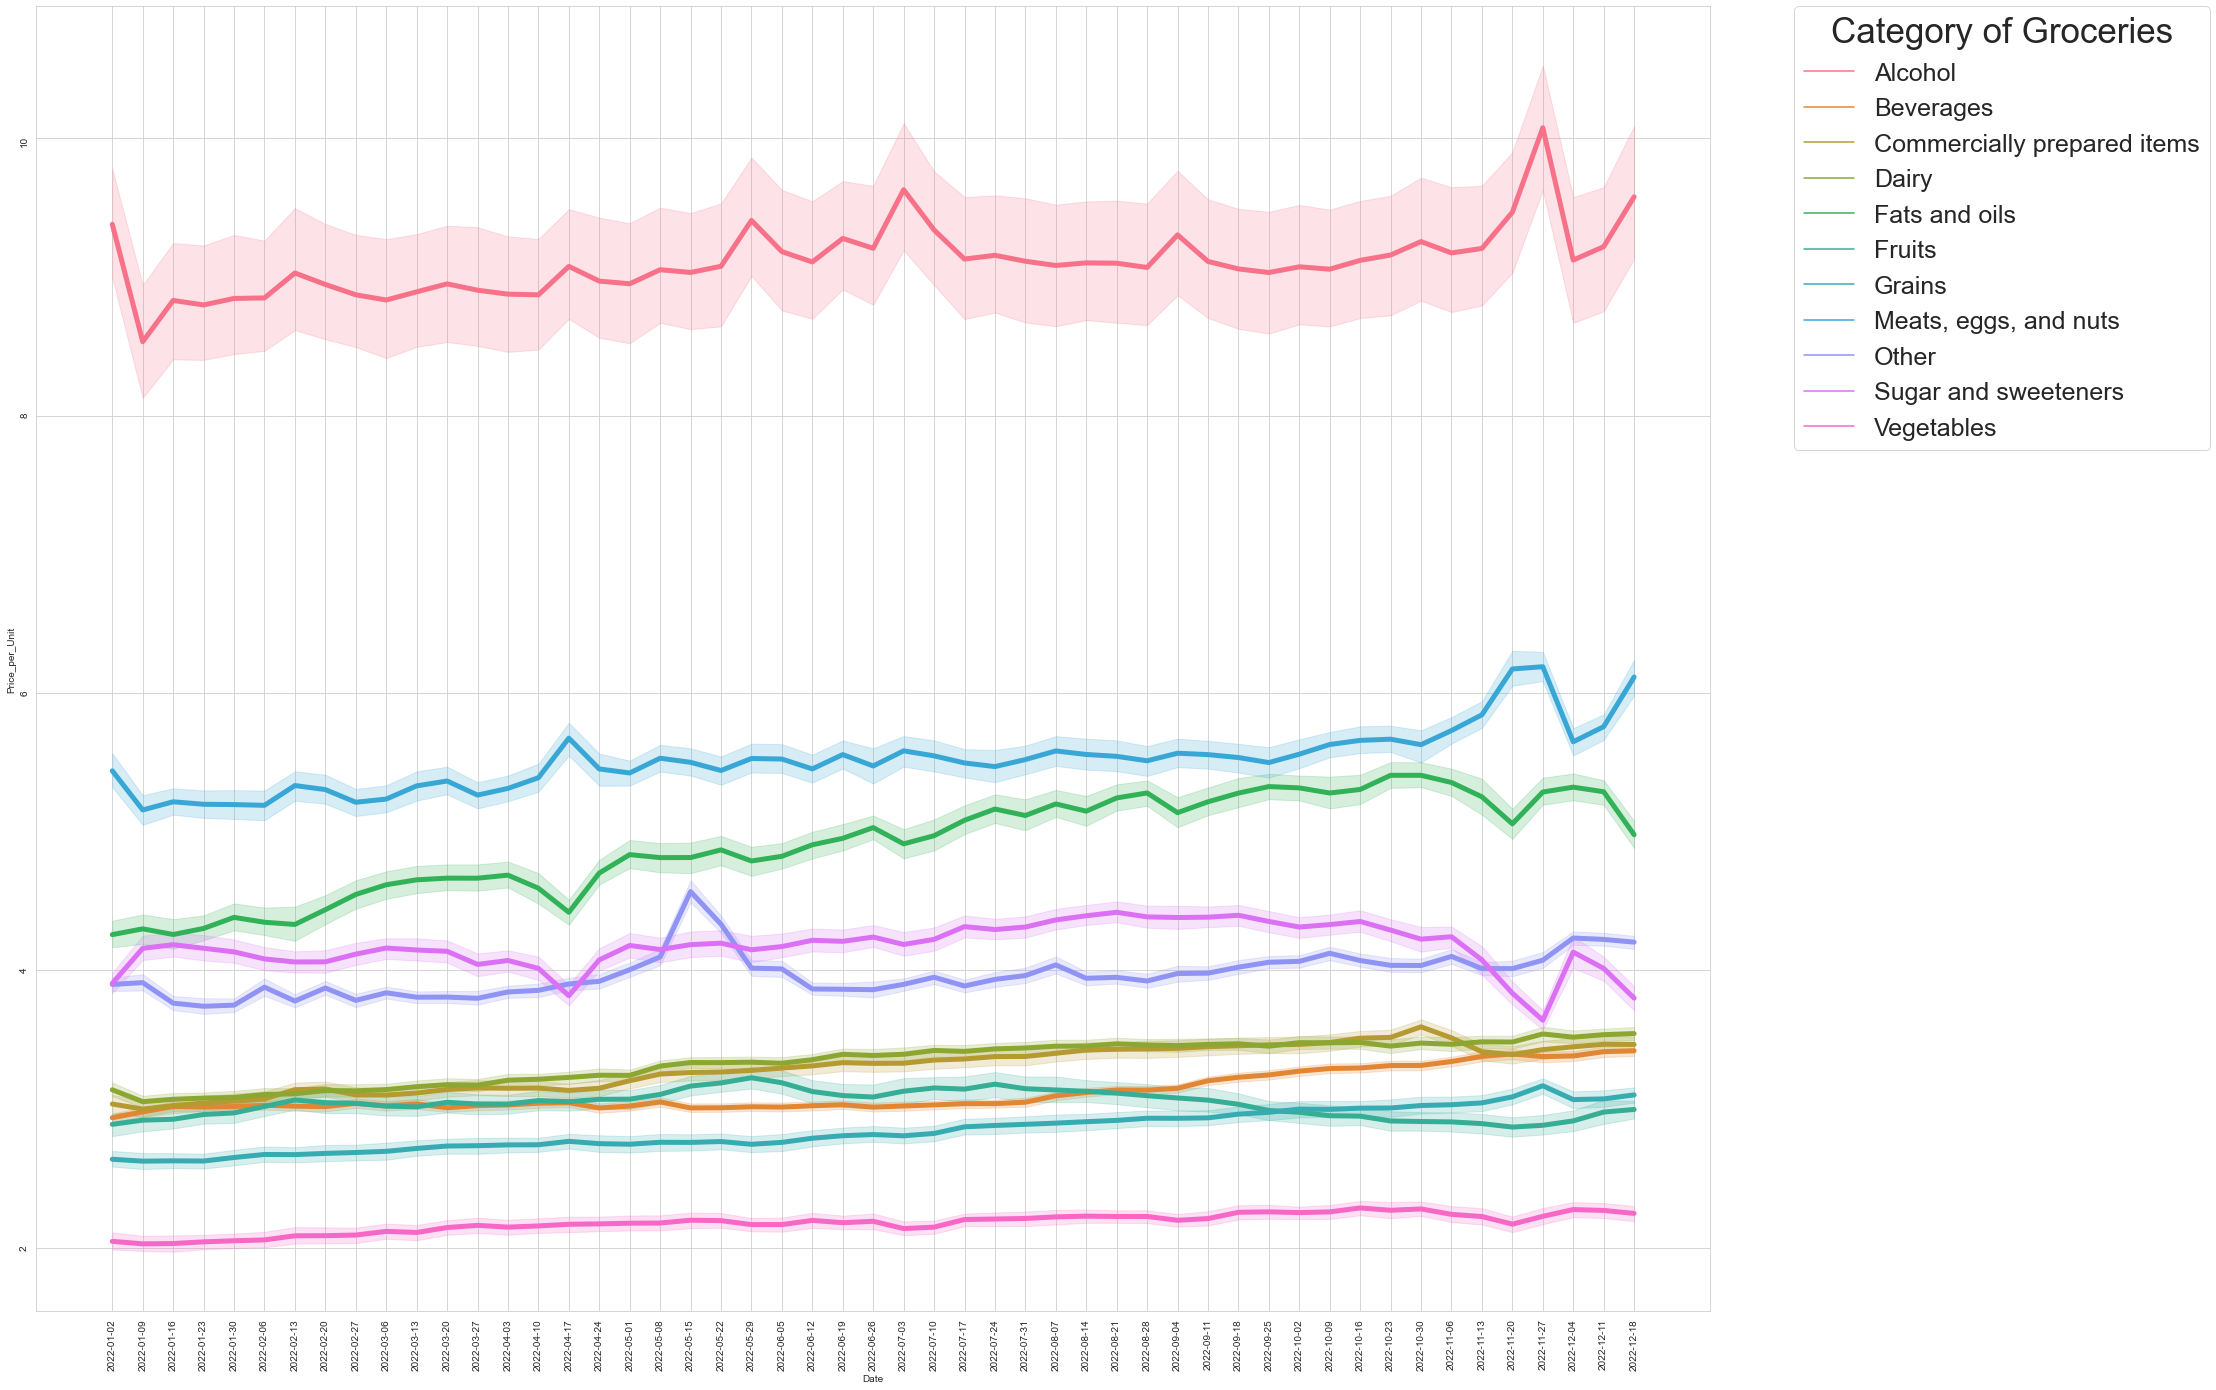

In [33]:
# The year 2022
fig = plt.figure(figsize= (30,24))
ax = sns.lineplot(data=df_2022, x = "Date", y = "Price_per_Unit", hue = 'Category', lw = 5 )


leg = plt.legend(bbox_to_anchor=(1.05, 1), borderaxespad=0,
           title = 'Category of Groceries', fontsize = '25', title_fontsize = '35')

ax.tick_params(rotation = 90)
plt.show()

In [34]:
# The year 2023
#fig = plt.figure(figsize= (30,24))
#ax = sns.lineplot(data=df_2023, x = "Date", y = "Price_per_Unit", hue = 'Category', lw = 5 )


#leg = plt.legend(bbox_to_anchor=(1.05, 1), borderaxespad=0,
#           title = 'Category of Groceries', fontsize = '25', title_fontsize = '35')

#ax.tick_params(rotation = 90)
#plt.show()

This is great, really! I can plainly see that the price fluctuations on the red, blue, green, purple, and pink lines over time are clear-cut and noticeable. 

In [35]:
state = list(set(df['State']))
cat = list(df['Category'])
df.head()

,Date,State,Category,Dollars,Unit sales,Volume sales,Dollars last year,Unit sales last year,Volume sales last year,Dollars 3 years ago,Unit sales 3 years ago,Volume sales 3 years ago,Percent change dollars 1 year,Percent change units 1 year,Percent change volume 1 year,Percent change dollars 3 years,Percent change units 3 years,Percent change volume 3 years,Dollars_Converted,Unit_Converted,Price_per_Unit
0,2019-10-06,Alabama,Alcohol,23611285.0,2974221.0,837930.0,22449300.0,2979065.0,815637.0,NaN,NaN,NaN,5.2,-0.2,2.7,NaN,NaN,NaN,23611285.0,2974221.0,7.938645
1,2019-10-13,Alabama,Alcohol,23220758.0,2895573.0,830131.0,23314625.0,2978312.0,855363.0,NaN,NaN,NaN,-0.4,-2.8,-2.9,NaN,NaN,NaN,23220758.0,2895573.0,8.019400
2,2019-10-20,Alabama,Alcohol,21770283.0,2730939.0,762832.0,21070374.0,2745973.0,766339.0,NaN,NaN,NaN,3.3,-0.5,-0.5,NaN,NaN,NaN,21770283.0,2730939.0,7.971721
3,2019-10-27,Alabama,Alcohol,21956558.0,2764970.0,768366.0,20188919.0,2651957.0,713812.0,NaN,NaN,NaN,8.8,4.3,7.6,NaN,NaN,NaN,21956558.0,2764970.0,7.940975
4,2019-11-03,Alabama,Alcohol,23183482.0,2872683.0,815352.0,22565261.0,2884813.0,801717.0,NaN,NaN,NaN,2.7,-0.4,1.7,NaN,NaN,NaN,23183482.0,2872683.0,8.070324


In [36]:
Year_Month = [i.split(" ")[0][:-3] for i in  list(df['Date'])]
Year = [i.split(" ")[0][0:4] for i in  list(df['Date'])]
Month = [i.split(" ")[0][5:7] for i in  list(df['Date'])]


df['Year'] = Year
df['Month'] = Month
df['Year_Month'] = Year_Month

# Create a monthly dataframe
df_month = df.groupby(['State', 'Category', 'Year']).mean()


df_month.head()

Dollars    Unit sales  Volume sales  \
State   Category  Year                                             
Alabama Alcohol   2019  2.293924e+07  2.822996e+06  7.861141e+05   
                  2020  2.536893e+07  2.966790e+06  8.466995e+05   
                  2021  2.526778e+07  2.909018e+06  7.967640e+05   
                  2022  2.577376e+07  2.913789e+06  7.783465e+05   
        Beverages 2019  4.008188e+07  1.751455e+07  2.523039e+08   

                        Dollars last year  Unit sales last year  \
State   Category  Year                                            
Alabama Alcohol   2019       2.122518e+07          2.698444e+06   
                  2020       2.252879e+07          2.817294e+06   
                  2021       2.536893e+07          2.966790e+06   
                  2022       2.521041e+07          2.906628e+06   
        Beverages 2019       3.853487e+07          1.725119e+07   

                        Volume sales last year  Dollars 3 years ago  \
State   Category  Year                                                
Alabama Alcohol   2019            7.385722e+05                  NaN   
                  2020            7.900623e+05                  NaN   
                  2021            8.466995e+05         2.122518e+07   
                  2022            7.965527e+05         2.247645e+07   
        Beverages 2019            2.417340e+08                  NaN   

                        Unit sales 3 years ago  Volume sales 3 years ago  \
State   Category  Year                                                     
Alabama Alcohol   2019                     NaN                       NaN   
                  2020                     NaN                       NaN   
                  2021            2.698444e+06             738572.153846   
                  2022            2.815581e+06             789587.411765   
        Beverages 2019                     NaN                       NaN   

                        Percent change dollars 1 year  \
State   Category  Year                                  
Alabama Alcohol   2019                       8.530769   
                  2020                      12.694231   
                  2021                       0.290385   
                  2022                       2.243137   
        Beverages 2019                       4.100000   

                        Percent change units 1 year  \
State   Category  Year                                
Alabama Alcohol   2019                     4.953846   
                  2020                     5.436538   
                  2021                    -1.575000   
                  2022                     0.276471   
        Beverages 2019                     1.653846   

                        Percent change volume 1 year  \
State   Category  Year                                 
Alabama Alcohol   2019                      6.946154   
                  2020                      7.344231   
                  2021                     -5.269231   
                  2022                     -2.282353   
        Beverages 2019                      4.553846   

                        Percent change dollars 3 years  \
State   Category  Year                                   
Alabama Alcohol   2019                             NaN   
                  2020                             NaN   
                  2021                       19.630769   
                  2022                       14.905882   
        Beverages 2019                             NaN   

                        Percent change units 3 years  \
State   Category  Year                                 
Alabama Alcohol   2019                           NaN   
                  2020                           NaN   
                  2021                      8.161538   
                  2022                      3.643137   
        Beverages 2019                           NaN   

                        Percent change volume 3 years  Dollars_Converted

In [37]:
df.head()

,Date,State,Category,Dollars,Unit sales,Volume sales,Dollars last year,Unit sales last year,Volume sales last year,Dollars 3 years ago,Unit sales 3 years ago,Volume sales 3 years ago,Percent change dollars 1 year,Percent change units 1 year,Percent change volume 1 year,Percent change dollars 3 years,Percent change units 3 years,Percent change volume 3 years,Dollars_Converted,Unit_Converted,Price_per_Unit,Year,Month,Year_Month
0,2019-10-06,Alabama,Alcohol,23611285.0,2974221.0,837930.0,22449300.0,2979065.0,815637.0,NaN,NaN,NaN,5.2,-0.2,2.7,NaN,NaN,NaN,23611285.0,2974221.0,7.938645,2019,10,2019-10
1,2019-10-13,Alabama,Alcohol,23220758.0,2895573.0,830131.0,23314625.0,2978312.0,855363.0,NaN,NaN,NaN,-0.4,-2.8,-2.9,NaN,NaN,NaN,23220758.0,2895573.0,8.019400,2019,10,2019-10
2,2019-10-20,Alabama,Alcohol,21770283.0,2730939.0,762832.0,21070374.0,2745973.0,766339.0,NaN,NaN,NaN,3.3,-0.5,-0.5,NaN,NaN,NaN,21770283.0,2730939.0,7.971721,2019,10,2019-10
3,2019-10-27,Alabama,Alcohol,21956558.0,2764970.0,768366.0,20188919.0,2651957.0,713812.0,NaN,NaN,NaN,8.8,4.3,7.6,NaN,NaN,NaN,21956558.0,2764970.0,7.940975,2019,10,2019-10
4,2019-11-03,Alabama,Alcohol,23183482.0,2872683.0,815352.0,22565261.0,2884813.0,801717.0,NaN,NaN,NaN,2.7,-0.4,1.7,NaN,NaN,NaN,23183482.0,2872683.0,8.070324,2019,11,2019-11


In [38]:
# Setting variables in the next line of code
state = list(set(df['Category']))
district = state

In [134]:
#extract color palette, the palette can be changed
pal = list(sns.color_palette(palette='viridis', n_colors=len(state)).as_hex())

fig = go.Figure()
for d,p in zip(district, pal):
    fig.add_trace(go.Line(x = df[df['Category']==d]['Date'],
                             y = df[df['Category']==d]['Price_per_Unit'],
                             name = d,
                             line_color = p, 
                             fill=None))   #tozeroy 

fig.show()

/opt/anaconda3/lib/python3.9/site-packages/plotly/graph_objs/_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




    From this we can say there is a "Best time" to buy products:

    Sugar/Sweet, Fruits, Fats and Oils are best time to buy around Holidays.
    Dairy around Christmas time.

    Beverages are cheapest in the summer.

    Vegetables are best to buy around March and September.

    Alcohol, Grains, Meats, Eggs, and Nuts all year long. 

    Commercially prepared food does follow a 6-week cycle.

In [40]:
# Northern states all grocery categories
north = df[((df['State'] == 'New York') | (df['State'] == 'Connecticut') | (df['State'] == 'Illinois') | 
             (df['State'] == 'Indiana') | (df['State'] == 'Iowa') | (df['State'] == 'Maine') | 
             (df['State'] == 'Massachusetts') | (df['State'] == 'Michigan') | (df['State'] == 'Minnesota') | 
             (df['State'] == 'New Hampshire') | (df['State'] == 'New Jersey') | (df['State'] == 'North Dakota') | 
             (df['State'] == 'Ohio') | (df['State'] == 'Pennsylvania') | (df['State'] == 'Rhode Island') | 
             (df['State'] == 'Vermont') | (df['State'] == 'Wisconsin'))]

In [41]:
# Southern states all grocery categories
south = df[((df['State'] == 'Alabama') | (df['State'] == 'Arkansas') | (df['State'] == 'Delaware') | (df['State'] == 'Florida') | (df['State'] == 'Georgia') | (df['State'] == 'Kentucky') |
          (df['State'] == 'Louisiana') | (df['State'] == 'Maryland') | (df['State'] == 'Mississippi') | (df['State'] == 'North Carolina') | (df['State'] == 'Oklahoma') | (df['State'] == 'South Carolina') |
          (df['State'] == 'Tennessee') | (df['State'] == 'Texas') | (df['State'] == 'Virginia') | (df['State'] == 'West Virginia'))]

In [42]:
north_tot = df['Unit_Converted'].sum()
south_tot = df['Unit_Converted'].sum()

north_tot
south_tot

737812324416.0

In [43]:
full_north = north['Unit_Converted'].sum()
full_south = south['Unit_Converted'].sum()

In [44]:
full_north 

232952361272.0

In [45]:
full_south

322293042746.0

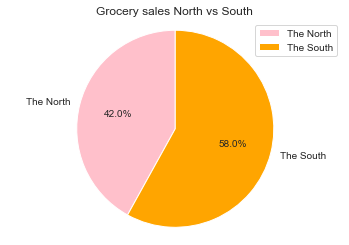

In [46]:
labels= ['The North', 'The South']

colors=['pink', 'orange']

totals= [full_north, full_south]

plt.pie(totals, labels=labels, colors=colors, startangle=90, autopct='%1.1f%%')
plt.legend(labels)
plt.title("Grocery sales North vs South")
plt.axis('equal')

plt.show()

From this pie chart it is very obvious that the South buy more products than the North. My hypothesis is that due to south having the two largest states Texas and Florida they have the largest population in the united states which is why the South has higher grocey sale. 

In [47]:
# Focuing only on data for TN
df.drop(df.index[df['State'] != 'Tennessee'], inplace=True)

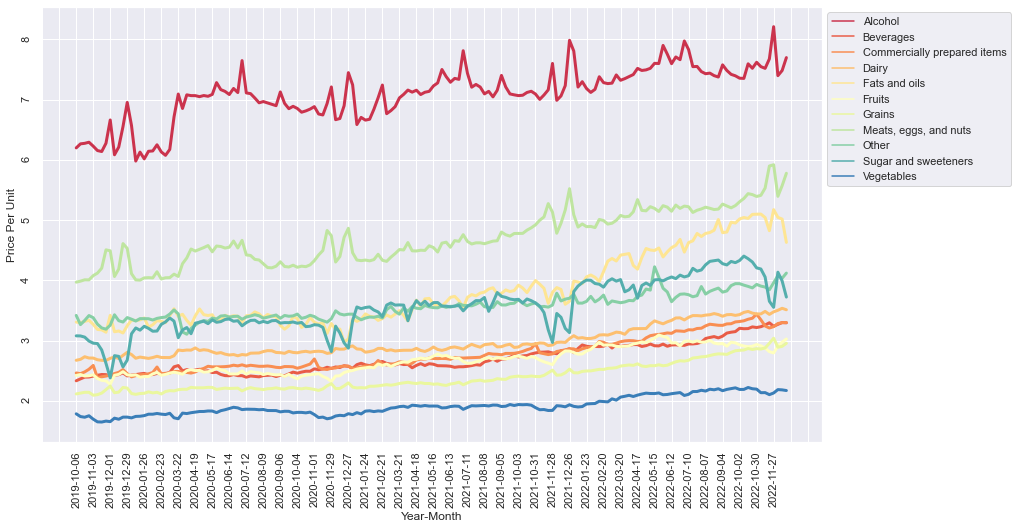

In [48]:
# Showcasing Tennessee price per unit sales throughout the three years utilizing ticker import
sns.set_style('whitegrid')
sns.set(rc={'figure.figsize':(14,8)})

ax = sns.lineplot(data = df, x = "Date", y = "Price_per_Unit",
                  hue = 'Category', palette = 'Spectral',
                  legend = 'full', lw = 3)

ax.xaxis.set_major_locator(ticker.MultipleLocator(4))
plt.legend(bbox_to_anchor=(1, 1))
plt.ylabel('Price Per Unit')
plt.xlabel('Year-Month')
ax.tick_params(rotation = 90)
plt.show()

In [49]:
sale_data = data.groupby(['State', 'Category'])['Unit sales'].sum().reset_index()

In [50]:
sale_data

,State,Category,Unit sales
0,Alabama,Alcohol,4.908442e+08
1,Alabama,Beverages,3.179999e+09
2,Alabama,Commercially prepared items,4.957565e+09
3,Alabama,Dairy,9.158652e+08
4,Alabama,Fats and oils,1.325570e+08
...,...,...,...
468,Wyoming,Grains,8.585405e+07
469,Wyoming,"Meats, eggs, and nuts",1.659511e+08
470,Wyoming,Other,2.077331e+07
471,Wyoming,Sugar and sweeteners,5.889917e+06


In [51]:
px.bar(sale_data, x='State', y='Unit sales', color='Category')

So, we can clearly see that from all the sates present larger states such as California, Texas, and Florida have the highest unit sales in all the grocery categories. The most selling produc from all these states is definitely commercially prepared items and beverages.

# Modeling for predicting the Unit sales

### Merging and imputing missing values

In [52]:
# Checking for missing values
df.isnull().sum()

Date                                 0
State                                0
Category                             0
Dollars                              0
Unit sales                           0
Volume sales                       168
Dollars last year                    0
Unit sales last year                 0
Volume sales last year             168
Dollars 3 years ago               1144
Unit sales 3 years ago            1144
Volume sales 3 years ago          1208
Percent change dollars 1 year        0
Percent change units 1 year          0
Percent change volume 1 year       168
Percent change dollars 3 years    1144
Percent change units 3 years      1144
Percent change volume 3 years     1208
Dollars_Converted                    0
Unit_Converted                       0
Price_per_Unit                       0
Year                                 0
Month                                0
Year_Month                           0
dtype: int64

In [53]:
# These values have enough variance to allow front fill propogation
df['Volume sales'] = df['Volume sales'].fillna(df['Volume sales'].mean())
df['Volume sales last year'] = df['Volume sales last year'].fillna(df['Volume sales last year'].mean())
df['Dollars 3 years ago'] = df['Dollars 3 years ago'].fillna(df['Dollars 3 years ago'].mean())
df['Unit sales 3 years ago'] = df['Unit sales 3 years ago'].fillna(df['Unit sales 3 years ago'].mean())
df['Volume sales 3 years ago'] = df['Volume sales 3 years ago'].fillna(df['Volume sales 3 years ago'].mean())

In [54]:
# Creating a new dataframe
data1 = df[['Date','State','Category','Dollars','Unit sales','Volume sales','Dollars last year',
            'Unit sales last year','Volume sales last year','Dollars 3 years ago','Unit sales 3 years ago',
           'Volume sales 3 years ago','Dollars_Converted','Unit_Converted','Price_per_Unit','Year','Month',
            'Year_Month']]

In [55]:
data1.isnull().sum()

Date                        0
State                       0
Category                    0
Dollars                     0
Unit sales                  0
Volume sales                0
Dollars last year           0
Unit sales last year        0
Volume sales last year      0
Dollars 3 years ago         0
Unit sales 3 years ago      0
Volume sales 3 years ago    0
Dollars_Converted           0
Unit_Converted              0
Price_per_Unit              0
Year                        0
Month                       0
Year_Month                  0
dtype: int64

In [56]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1848 entries, 5712 to 78119
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      1848 non-null   object 
 1   State                     1848 non-null   object 
 2   Category                  1848 non-null   object 
 3   Dollars                   1848 non-null   float64
 4   Unit sales                1848 non-null   float64
 5   Volume sales              1848 non-null   float64
 6   Dollars last year         1848 non-null   float64
 7   Unit sales last year      1848 non-null   float64
 8   Volume sales last year    1848 non-null   float64
 9   Dollars 3 years ago       1848 non-null   float64
 10  Unit sales 3 years ago    1848 non-null   float64
 11  Volume sales 3 years ago  1848 non-null   float64
 12  Dollars_Converted         1848 non-null   float64
 13  Unit_Converted            1848 non-null   float64
 14  Pric

### Encode Categorical Variables

In [57]:
#Date_dummies = pd.get_dummies(data1['Date'], drop_first=True)
State_dummies = pd.get_dummies(data1['State'], drop_first=True)
#Category_dummies = pd.get_dummies(data1['Category'], drop_first=True)
#Year_dummies = pd.get_dummies(data1['Year'], drop_first=True)
#Month_dummies = pd.get_dummies(data1['Month'], drop_first=True)
#Year_Month_dummies = pd.get_dummies(data1['Year_Month'], drop_first=True)

In [58]:
#data1 = pd.concat([data1, Date_dummies], axis=1)
data1 = pd.concat([data1, State_dummies], axis=1)
#data1 = pd.concat([data1, Category_dummies], axis=1)
#data1 = pd.concat([data1, Year_dummies], axis=1)
#data1 = pd.concat([data1, Month_dummies], axis=1)
#data1 = pd.concat([data1, Year_Month_dummies], axis=1)

In [59]:
data1 = data1.drop(['Date','State','Category','Year','Month','Year_Month'], axis=1)

In [60]:
data1.info(all)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1848 entries, 5712 to 78119
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Dollars                   1848 non-null   float64
 1   Unit sales                1848 non-null   float64
 2   Volume sales              1848 non-null   float64
 3   Dollars last year         1848 non-null   float64
 4   Unit sales last year      1848 non-null   float64
 5   Volume sales last year    1848 non-null   float64
 6   Dollars 3 years ago       1848 non-null   float64
 7   Unit sales 3 years ago    1848 non-null   float64
 8   Volume sales 3 years ago  1848 non-null   float64
 9   Dollars_Converted         1848 non-null   float64
 10  Unit_Converted            1848 non-null   float64
 11  Price_per_Unit            1848 non-null   float64
dtypes: float64(12)
memory usage: 187.7 KB


### Train Test Split and Standardization

In [61]:
simple_df = data1.copy()

In [62]:
X = simple_df.drop('Dollars', axis=1)
y = simple_df['Dollars']

In [63]:
X.isnull().sum()

Unit sales                  0
Volume sales                0
Dollars last year           0
Unit sales last year        0
Volume sales last year      0
Dollars 3 years ago         0
Unit sales 3 years ago      0
Volume sales 3 years ago    0
Dollars_Converted           0
Unit_Converted              0
Price_per_Unit              0
dtype: int64

In [64]:
X.head()

,Unit sales,Volume sales,Dollars last year,Unit sales last year,Volume sales last year,Dollars 3 years ago,Unit sales 3 years ago,Volume sales 3 years ago,Dollars_Converted,Unit_Converted,Price_per_Unit
5712,4293711.0,908962.0,24129767.0,3801023.0,841626.0,2.585080e+07,9.642065e+06,4.369841e+07,26611385.0,4293711.0,6.197759
5713,3980434.0,846609.0,23124091.0,3610471.0,798296.0,2.585080e+07,9.642065e+06,4.369841e+07,24937242.0,3980434.0,6.264956
5714,3844171.0,810387.0,22785691.0,3549460.0,778963.0,2.585080e+07,9.642065e+06,4.369841e+07,24117728.0,3844171.0,6.273844
5715,3806807.0,805805.0,21858661.0,3394832.0,744257.0,2.585080e+07,9.642065e+06,4.369841e+07,23952074.0,3806807.0,6.291907
5716,3885591.0,809335.0,22482986.0,3487221.0,762315.0,2.585080e+07,9.642065e+06,4.369841e+07,24194205.0,3885591.0,6.226647


### Scaling the Data

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

sc = StandardScaler()
# fit the data
sc.fit(X_train)

#transform the train data
X_train_sc = sc.transform(X_train)
X_train_sc = pd.DataFrame(X_train_sc, columns=X_train.columns)

#transform the test data
X_test_sc = sc.transform(X_test)
X_test_sc = pd.DataFrame(X_test_sc, columns=X_test.columns)

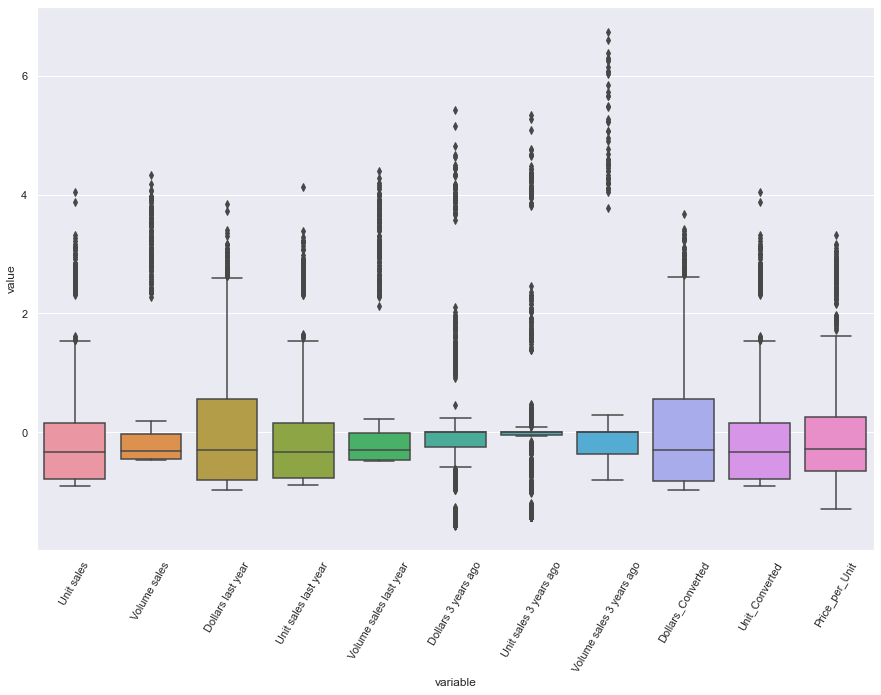

In [66]:
plt.figure(figsize=(15,10))
sns.boxplot(x="variable", y="value", data=pd.melt(X_train_sc))
plt.xticks(rotation = '60')
plt.show()

### Build the Model

iteration 0.0001 done
iteration 0.001 done
iteration 0.01 done
iteration 0.1 done
iteration 0.5 done
iteration 1 done
iteration 3 done
iteration 5 done
iteration 10 done
iteration 20 done
iteration 50 done


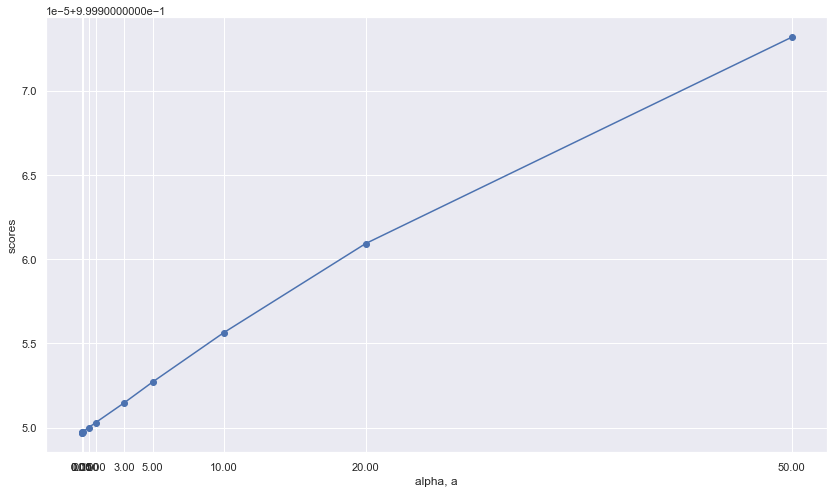

In [67]:
# here alpha is the lambda in the lecture note, the coefficient of lasso penalty
alphas = [0.0001, 0.001, 0.01, 0.1, 0.5, 1, 3, 5, 10, 20, 50] 
scores = []

for a in alphas:
    lasso = Lasso(alpha = a, normalize = True)
    lasso.fit(X_train, y_train)
    #yhat_test=lasso.predict(X_test)
    #scores.append(mean_squared_error(y_test, yhat_test))
    scores.append(lasso.score(X_test, y_test))
    print("iteration {} done".format(a))


plt.plot(alphas, scores, '-o')
plt.xlabel('alpha, a')
plt.ylabel('scores')
plt.xticks(alphas)
plt.show()

### Tuning Lasso Hyperparameters

In [68]:
# Implementing the K fold Crossvalidation method
cv = RepeatedKFold(n_splits = 10, n_repeats = 5, random_state = 42 )

In [69]:
# define model
model = LassoCV(alphas = arange(0, 10, 0.1),fit_intercept=True, normalize=True, max_iter=5000, cv = cv)

In [70]:
# fit model
model.fit(X_train, y_train)

LassoCV(alphas=array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1,
       5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4,
       6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7,
       7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. ,
       9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9]),
        cv=RepeatedKFold(n_repeats=5, n_splits=10, random_state=42),
        max_iter=5000, normalize=True)

In [71]:
# summarize chosen configuration
print('alpha: %f' % model.alpha_)

alpha: 0.000000


In [72]:
y_hat_test = model.predict(X_test)

In [73]:
#Lets calculate the MSE and RMSE from our test data
test_mse = mean_squared_error(y_test, y_hat_test)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_hat_test)
test_r_squared = r2_score(y_test, y_hat_test)
test_mape = mean_absolute_percentage_error(y_test, y_hat_test)

In [74]:
print(f' the test MSE is: {test_mse}')
print(f' the test RMSE is: {test_rmse}')
print(f' the test MAE is: {test_mae}')
print(f' the test Rsquared is: {test_r_squared}')
print(f' the test MAPE is: {test_mape}')

 the test MSE is: 13038224739.05719
 the test RMSE is: 114185.0460395633
 the test MAE is: 65285.7483899424
 the test Rsquared is: 0.999987256158215
 the test MAPE is: 0.003977387962365543


### Grid search alpha values

In [75]:
# define model
model = Lasso(fit_intercept=True, normalize = True, max_iter=3000)

# define model evaluation method
cv = RepeatedKFold(n_splits = 10, n_repeats = 5, random_state = 42)
# define grid
grid = dict()
grid['alpha'] = arange(.0000001, .0001, .005)
# define search
search = GridSearchCV(model, grid, scoring = 'neg_mean_squared_error', cv = cv)
# perform the search
results = search.fit(X_train, y_train)

In [76]:
print('MSE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

MSE: -7796617220.536
Config: {'alpha': 1e-07}


In [77]:
sorted(results.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_alpha',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split10_test_score',
 'split11_test_score',
 'split12_test_score',
 'split13_test_score',
 'split14_test_score',
 'split15_test_score',
 'split16_test_score',
 'split17_test_score',
 'split18_test_score',
 'split19_test_score',
 'split1_test_score',
 'split20_test_score',
 'split21_test_score',
 'split22_test_score',
 'split23_test_score',
 'split24_test_score',
 'split25_test_score',
 'split26_test_score',
 'split27_test_score',
 'split28_test_score',
 'split29_test_score',
 'split2_test_score',
 'split30_test_score',
 'split31_test_score',
 'split32_test_score',
 'split33_test_score',
 'split34_test_score',
 'split35_test_score',
 'split36_test_score',
 'split37_test_score',
 'split38_test_score',
 'split39_test_score',
 'split3_test_score',
 'split40_test_score',
 'split41_test_score',
 'split42_test_score',
 'split43_test_score',
 'split44_test_score',
 '

In [78]:
results.best_estimator_

Lasso(alpha=1e-07, max_iter=3000, normalize=True)

In [79]:
model_lasso = Lasso(alpha =  0.0000001, fit_intercept=True, normalize=False, max_iter=3000)
model_lasso.fit(X_train, y_train)

Lasso(alpha=1e-07, max_iter=3000, normalize=False)

In [80]:
y_hat_train = model_lasso.predict(X_train)

In [81]:
#Lets calculate the MSE and RMSE from our training data
train_mse = mean_squared_error(y_train, y_hat_train)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train, y_hat_train)
train_r_squared = r2_score(y_train, y_hat_train)
train_mape = mean_absolute_percentage_error(y_train, y_hat_train)

print(f' the train RMSE is: {train_rmse}')
print(f' the train Rsquared is: {train_r_squared}')
print(f' the train MAPE is: {train_mape}')

 the train RMSE is: 6115.225819783351
 the train Rsquared is: 0.9999999586392514
 the train MAPE is: 0.00029981994666428884


### Prediction accuracy in Both training and test data

In [82]:
# Calculates the estimated y values using the test dataset
y_hat_test = model_lasso.predict(X_test)

In [83]:
#Lets calculate the MSE and RMSE from our test data
test_mse = mean_squared_error(y_test, y_hat_test)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_hat_test)
test_r_squared = r2_score(y_test, y_hat_test)
test_mape = mean_absolute_percentage_error(y_test, y_hat_test)

print(f' the test RMSE is: {test_rmse}')
print(f' the test Rsquared is: {test_r_squared}')
print(f' the test MAPE is: {test_mape}')

 the test RMSE is: 8122.077754823572
 the test Rsquared is: 0.9999999355213117
 the test MAPE is: 0.0002828667214479113


In [84]:
cv = RepeatedKFold(n_splits = 10, n_repeats = 5, random_state = 42 )
model = LassoCV(alphas = arange(210, 240, 0.1), cv = cv)
result_train = model.fit(X_train_sc, y_train)

In [85]:
lasso_pred = model.predict(X_test_sc)


lasso_results = pd.DataFrame(y_test.reset_index())
df_lasso_pred = pd.DataFrame(lasso_pred)
lasso_results = pd.concat([lasso_results, df_lasso_pred], axis = 1)
lasso_results = lasso_results.rename(columns = {0:'lasso_pred'})
lasso_results.head()

,index,Dollars,lasso_pred
0,20175,88112404.0,8.840453e+07
1,56392,52816698.0,5.294220e+07
2,70732,1495272.0,1.521277e+06
3,56367,54720376.0,5.521423e+07
4,20232,100912843.0,1.007277e+08


In [86]:
lasso_results['lasso_resid'] = lasso_results['Dollars'] - lasso_results['lasso_pred']

df_results = lasso_results
df_results.head()

,index,Dollars,lasso_pred,lasso_resid
0,20175,88112404.0,8.840453e+07,-292128.373464
1,56392,52816698.0,5.294220e+07,-125504.584970
2,70732,1495272.0,1.521277e+06,-26005.021290
3,56367,54720376.0,5.521423e+07,-493858.360268
4,20232,100912843.0,1.007277e+08,185096.629292


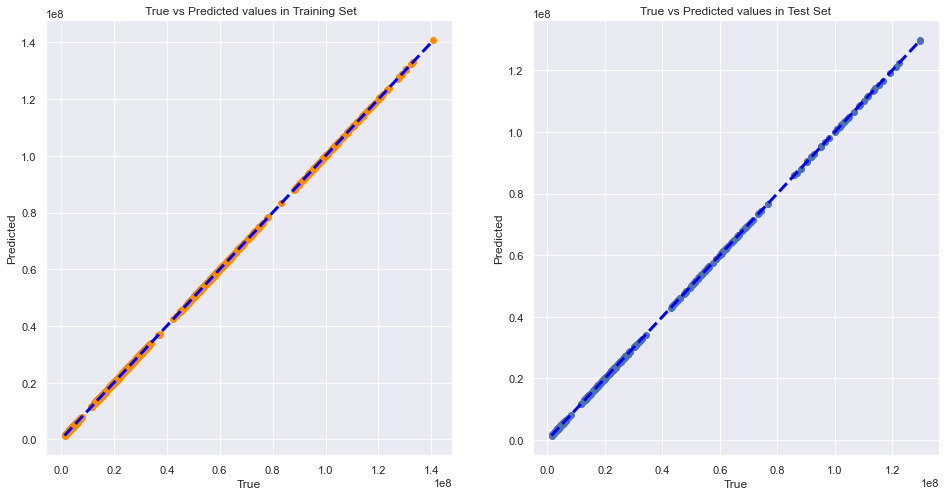

In [87]:
fig = plt.figure(figsize= (16,8))
plt.subplot(121)
plt.plot(y_train, y_hat_train, "o", color = "darkorange" )
identity_line = np.linspace(max(min(y_train), min(y_hat_train)), min(max(y_train), max(y_hat_train)))
plt.plot(identity_line, identity_line, color="blue", linestyle="dashed", linewidth=3.0)

plt.xlabel("True")
plt.ylabel("Predicted")
plt.title(" True vs Predicted values in Training Set")

plt.subplot(122)
#sns.relplot(x = y_test, y = y_hat_test)
plt.plot(y_test, y_hat_test, "o")
identity_line = np.linspace(max(min(y_test), min(y_hat_test)), min(max(y_train), max(y_hat_test)))
plt.plot(identity_line, identity_line, color="blue", linestyle="dashed", linewidth=3.0)
plt.xlabel("True")
plt.ylabel("Predicted")
plt.title("True vs Predicted values in Test Set")
#fig.savefig("True_vs_predicted_plot1.png")
plt.show()

Text(0.5, 1.0, 'Lasso Predictions of Total Sale vs Actual Total Sale')

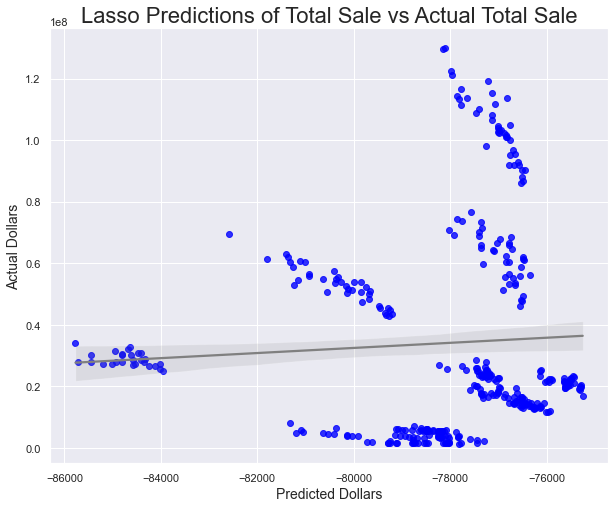

In [88]:
# Create scatterplot to show predicted values versus actual values
lasso_preds = lasso.predict(X_test_sc)

plt.figure(figsize=(10,8))
sns.regplot(data=X_train_sc, x=lasso_preds, y=y_test, marker='o', color='blue', line_kws={'color':'gray'})
plt.xlabel('Predicted Dollars', fontsize=14)
plt.ylabel('Actual Dollars', fontsize=14)
plt.title('Lasso Predictions of Total Sale vs Actual Total Sale', fontsize=22)

In [89]:
cv = RepeatedKFold(n_splits = 10, n_repeats = 5, random_state = 42 )
model = LassoCV(alphas = arange(210, 240, 0.1), cv = cv)
result_train = model.fit(X_train_sc, y_train)

In [90]:
alpha =  model.alphas_
alpha 

array([239.9, 239.8, 239.7, 239.6, 239.5, 239.4, 239.3, 239.2, 239.1,
       239. , 238.9, 238.8, 238.7, 238.6, 238.5, 238.4, 238.3, 238.2,
       238.1, 238. , 237.9, 237.8, 237.7, 237.6, 237.5, 237.4, 237.3,
       237.2, 237.1, 237. , 236.9, 236.8, 236.7, 236.6, 236.5, 236.4,
       236.3, 236.2, 236.1, 236. , 235.9, 235.8, 235.7, 235.6, 235.5,
       235.4, 235.3, 235.2, 235.1, 235. , 234.9, 234.8, 234.7, 234.6,
       234.5, 234.4, 234.3, 234.2, 234.1, 234. , 233.9, 233.8, 233.7,
       233.6, 233.5, 233.4, 233.3, 233.2, 233.1, 233. , 232.9, 232.8,
       232.7, 232.6, 232.5, 232.4, 232.3, 232.2, 232.1, 232. , 231.9,
       231.8, 231.7, 231.6, 231.5, 231.4, 231.3, 231.2, 231.1, 231. ,
       230.9, 230.8, 230.7, 230.6, 230.5, 230.4, 230.3, 230.2, 230.1,
       230. , 229.9, 229.8, 229.7, 229.6, 229.5, 229.4, 229.3, 229.2,
       229.1, 229. , 228.9, 228.8, 228.7, 228.6, 228.5, 228.4, 228.3,
       228.2, 228.1, 228. , 227.9, 227.8, 227.7, 227.6, 227.5, 227.4,
       227.3, 227.2,

In [91]:
model.coef_

array([ 2.80512199e+07,  2.15692341e+04,  3.27085747e+06, -2.70501058e+06,
        0.00000000e+00, -2.76968077e+05,  3.86614417e+05, -1.88401585e+04,
        2.71402700e+07, -2.57634415e+07, -4.51657263e+04])

In [92]:
model.intercept_

30327589.160351828

In [93]:
mse_val = model.mse_path_
av_mse = mse_val.mean(axis = 1)   
av_mse.shape

(300,)

In [94]:
model.n_iter_

1000

Text(0.5, 1.0, ' Average MSE vs alphas in Lasso CV ')

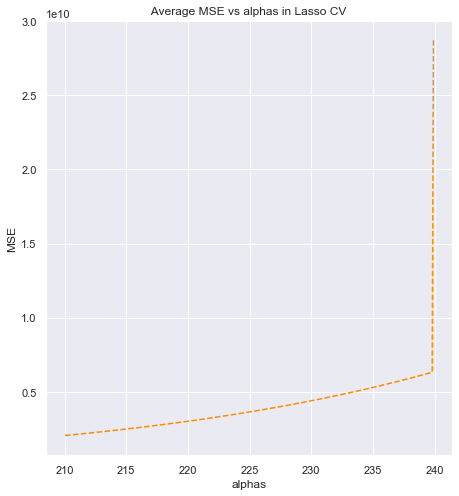

In [95]:
fig = plt.figure(figsize= (16,8))
plt.subplot(121)
plt.plot(model.alphas_, av_mse, "--", color = "darkorange"  )

plt.xlabel("alphas")
plt.ylabel("MSE")
plt.title(" Average MSE vs alphas in Lasso CV ")

In [96]:
cv = RepeatedKFold(n_splits = 10, n_repeats = 5, random_state = 42 )
model = LassoCV(alphas = arange(205, 250, 0.1), cv = cv)
result = model.fit(X_train_sc, y_train)

In [97]:
mse_val = result.mse_path_
av_mse = mse_val.mean(axis = 1)  

Text(0.5, 1.0, ' Average MSE vs alphas in Lasso CV ')

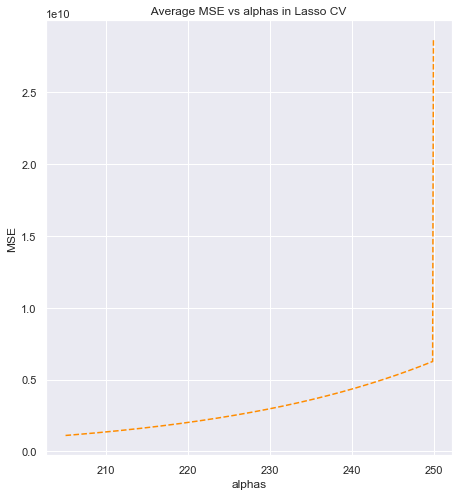

In [98]:
fig = plt.figure(figsize= (16,8))
plt.subplot(121)
plt.plot(model.alphas_, av_mse, "--", color = "darkorange"  )

plt.xlabel("alphas")
plt.ylabel("MSE")
plt.title(" Average MSE vs alphas in Lasso CV ")

In [99]:
result.alpha_

205.0

In [100]:
y_hat_train_sc = model.predict(X_train_sc)

In [101]:
# Calculating the MSE and RMSE from our training data
train_mse = mean_squared_error(y_train, y_hat_train_sc)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train, y_hat_train_sc)
train_r_squared = r2_score(y_train, y_hat_train_sc)
train_mape = mean_absolute_percentage_error(y_train, y_hat_train_sc)

In [102]:
print(f' the train MSE is:{train_mse}')
print(f' the train RMSE is:{train_rmse}')
print(f' the train MAE is:{train_mae}')
print(f' the train Rsquared is:{train_r_squared}')
print(f' the train MAPE is:{train_mape}')

 the train MSE is:27225054998.602154
 the train RMSE is:165000.1666623466
 the train MAE is:109012.45702376554
 the train Rsquared is:0.9999698885160905
 the train MAPE is:0.008097632068904386


In [103]:
y_hat_test_sc = model.predict(X_test_sc)

In [104]:
test_mse = mean_squared_error(y_test, y_hat_test_sc)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_hat_test_sc)
test_r_squared = r2_score(y_test, y_hat_test_sc)
test_mape = mean_absolute_percentage_error(y_test, y_hat_test_sc)

In [105]:
print(f' the test MSE is:{test_mse}')
print(f' the test RMSE is:{test_rmse}')
print(f' the test MAE is:{test_mae}')
print(f' the test Rsquared is:{test_r_squared}')
print(f' the test MAPE is:{test_mape}')

 the test MSE is:48181680752.110664
 the test RMSE is:219503.25909223003
 the test MAE is:125374.30047264135
 the test Rsquared is:0.9999529061870976
 the test MAPE is:0.007646183414165232


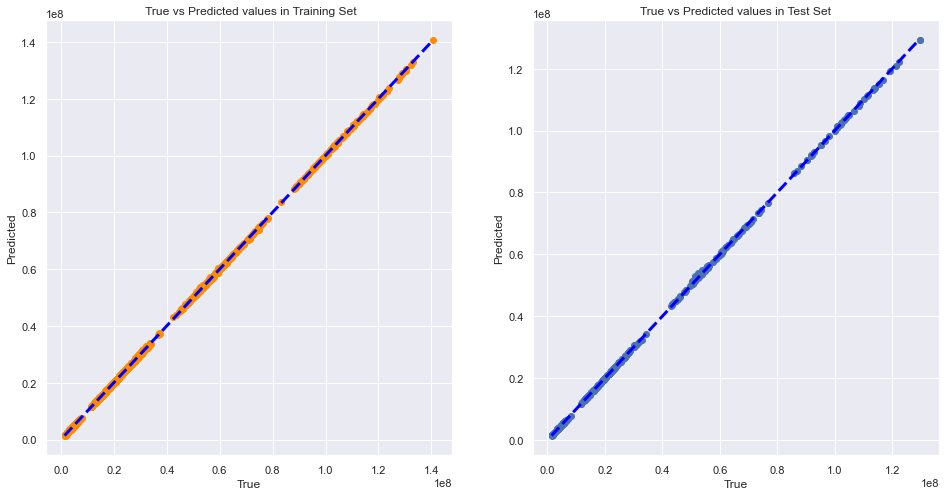

In [106]:
fig = plt.figure(figsize= (16,8))
plt.subplot(121)
plt.plot(y_train, y_hat_train_sc, "o", color = "darkorange"  )
identity_line = np.linspace(max(min(y_train), min(y_hat_train_sc)), min(max(y_train), max(y_hat_train_sc)))
plt.plot(identity_line, identity_line, color="blue", linestyle="dashed", linewidth=3.0)

plt.xlabel("True")
plt.ylabel("Predicted")
plt.title(" True vs Predicted values in Training Set")

plt.subplot(122)
#sns.relplot(x = y_test_original, y = test_pred_original)
plt.plot(y_test, y_hat_test_sc, "o")
identity_line = np.linspace(max(min(y_test), min(y_hat_test_sc)), min(max(y_train), max(y_hat_test_sc)))
plt.plot(identity_line, identity_line, color="blue", linestyle="dashed", linewidth=3.0)
plt.xlabel("True")
plt.ylabel("Predicted")
plt.title("True vs Predicted values in Test Set")
#fig.savefig("True_vs_predicted_plot2.png")
plt.show()

In [107]:
names = X.columns
names

Index(['Unit sales', 'Volume sales', 'Dollars last year',
       'Unit sales last year', 'Volume sales last year', 'Dollars 3 years ago',
       'Unit sales 3 years ago', 'Volume sales 3 years ago',
       'Dollars_Converted', 'Unit_Converted', 'Price_per_Unit'],
      dtype='object')

### Ridge Regression

In [108]:
# Ridge Regression Model
ridge_predictors = simple_df.drop('Dollars', axis=1)
ridge_target = simple_df['Dollars']

X_train, X_test, y_train, y_test = train_test_split(ridge_predictors, ridge_target, test_size=0.3, random_state=42)

sc.fit(X_train)

X_train_scaled = sc.transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)

X_test_scaled = sc.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [109]:
X_train_scaled.shape

(1293, 11)

In [110]:
y_train.shape

(1293,)

In [111]:
ridge = Ridge(alpha=5, normalize=False)
ridge.fit(X_train_scaled, y_train)

ridge_yhat_train = ridge.predict(X_train_scaled)
ridge_yhat_test = ridge.predict(X_test_scaled)

ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_yhat_test))
ridge_mape = mean_absolute_percentage_error(y_test, ridge_yhat_test)
ridge_mae = mean_absolute_error(y_test, ridge_yhat_test)
ridge_r_squared = r2_score(y_test, ridge_yhat_test)

print(f'RMSE: {round(ridge_rmse, 3)}')
print(f'MAE: {round(ridge_mae, 3)}')
print(f'MAPE: {round(ridge_mape, 3)}')
print(f'R Squared: {round(ridge_r_squared, 3)}')

RMSE: 683365.297
MAE: 448765.086
MAPE: 0.031
R Squared: 1.0


In [112]:
ridge = Ridge(fit_intercept=True, normalize=False, max_iter=3000)

ridge_cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=42)

grid = dict()
grid['alpha'] = np.arange(.0000001, .0001, .005)

search = GridSearchCV(ridge, grid, scoring='r2', cv=ridge_cv)
ridge_grid_results = search.fit(X_train_scaled, y_train)

In [113]:
ridge_grid_results.best_params_

{'alpha': 1e-07}

In [114]:
grid_ridge = Ridge(alpha=0.0000001, normalize=False)
grid_ridge.fit(X_train_scaled, y_train)

grid_ridge_yhat_train = grid_ridge.predict(X_train_scaled)
grid_ridge_yhat_test = grid_ridge.predict(X_test_scaled)

grid_ridge_rmse = np.sqrt(mean_squared_error(y_test, grid_ridge_yhat_test))
grid_ridge_mape = mean_absolute_percentage_error(y_test, grid_ridge_yhat_test)
grid_ridge_mae = mean_absolute_error(y_test, grid_ridge_yhat_test)
grid_ridge_r_squared = r2_score(y_test, grid_ridge_yhat_test)

print(f'RMSE: {round(grid_ridge_rmse, 3)}')
print(f'MAE: {round(grid_ridge_mae, 3)}')
print(f'MAPE: {round(grid_ridge_mape, 3)}')
print(f'R Squared: {round(grid_ridge_r_squared, 3)}')

RMSE: 0.05
MAE: 0.031
MAPE: 0.0
R Squared: 1.0


In [115]:
grid_ridge.coef_

array([-2.58449352e+01, -5.87430111e-03,  8.09761513e-01, -6.85937880e-01,
        1.07748409e-02, -5.54814599e-02,  8.87809817e-02, -4.05702763e-03,
        3.02389652e+07,  2.64849343e+01,  2.44365409e-03])

In [116]:
ridge_df = pd.DataFrame(grid_ridge.coef_)

In [117]:
names = pd.DataFrame(list(X_train.columns))
ridge_df = pd.concat([names, ridge_df], axis = 1)

In [118]:
ridge_df.columns = ['Feature', 'ridge_coeff']
ridge_df = ridge_df.sort_values(by='ridge_coeff', ascending = False)
ridge_df

,Feature,ridge_coeff
8,Dollars_Converted,3.023897e+07
9,Unit_Converted,2.648493e+01
2,Dollars last year,8.097615e-01
6,Unit sales 3 years ago,8.878098e-02
4,Volume sales last year,1.077484e-02
10,Price_per_Unit,2.443654e-03
7,Volume sales 3 years ago,-4.057028e-03
1,Volume sales,-5.874301e-03
5,Dollars 3 years ago,-5.548146e-02
3,Unit sales last year,-6.859379e-01


In [119]:
ridge_df_pred = pd.DataFrame(grid_ridge_yhat_train, columns=['ridge_pred'])

In [120]:
df_results = df['Dollars']

In [121]:
#df_results = pd.concat([df_results, ridge_df_pred], axis=1)
#df_results.head(10)

<AxesSubplot:title={'center':'True vs. Predicted in Test Set (alpha=0.0000001)'}, xlabel='Dollars'>

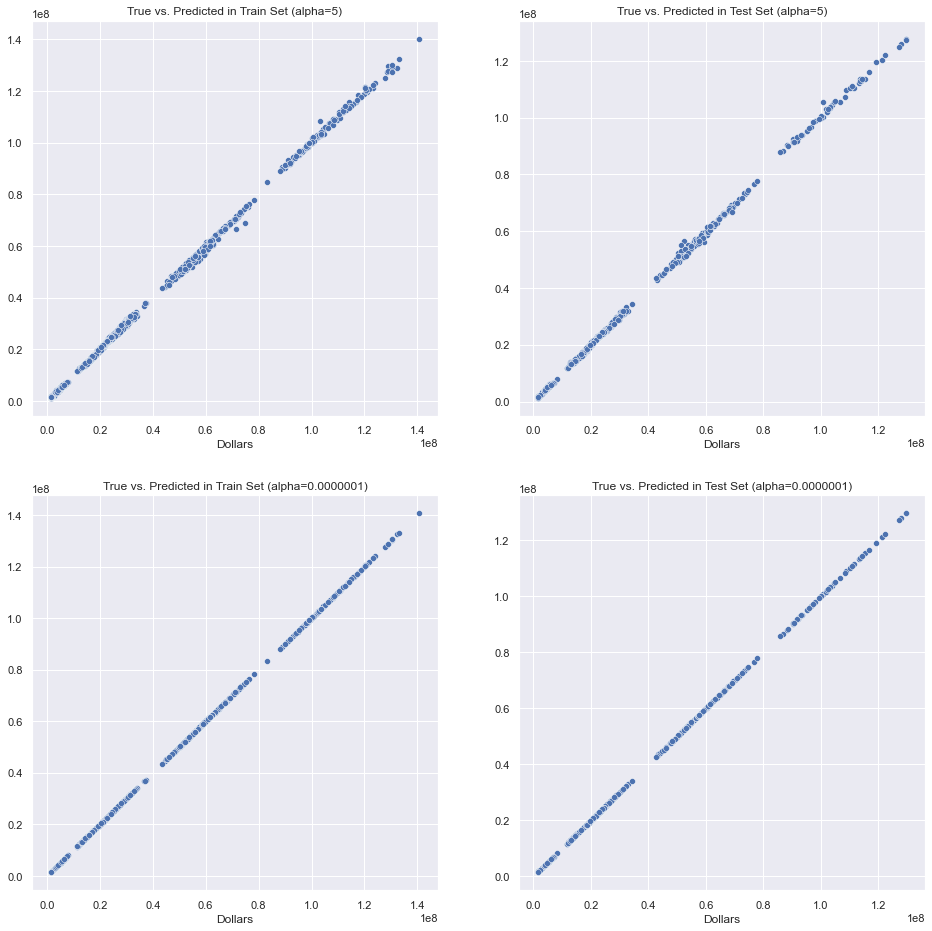

In [122]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(16, 16))
sns.set_style('whitegrid')

ax1.set_title('True vs. Predicted in Train Set (alpha=5)')
sns.scatterplot(x=y_train, y=ridge_yhat_train, ax=ax1)

ax2.set_title('True vs. Predicted in Test Set (alpha=5)')
sns.scatterplot(x=y_test, y=ridge_yhat_test, ax=ax2)

ax3.set_title('True vs. Predicted in Train Set (alpha=0.0000001)')
sns.scatterplot(x=y_train, y=grid_ridge_yhat_train, ax=ax3)

ax4.set_title('True vs. Predicted in Test Set (alpha=0.0000001)')
sns.scatterplot(x=y_test, y=grid_ridge_yhat_test, ax=ax4)

### Kernal Ridge

In [123]:
# Ridge Regression Model
kridge_predictors = simple_df.drop('Dollars', axis=1)
kridge_target = simple_df['Dollars']

X_train, X_test, y_train, y_test = train_test_split(kridge_predictors, kridge_target, test_size=0.3, random_state=42)

sc.fit(X_train)

X_train_scaled = sc.transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)

X_test_scaled = sc.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [124]:
X_train_scaled.shape

(1293, 11)

In [125]:
y_train.shape

(1293,)

In [126]:
KR_model = KernelRidge(kernel='polynomial', degree=3)
KR_cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=42)
search_grid = dict()
search_grid['alpha'] = arange(1, 15, .1)
search = GridSearchCV(KR_model, search_grid, scoring='r2', cv=KR_cv, n_jobs=-1) 
search_results = search.fit(X_train_scaled, y_train)

In [127]:
KRidge = KernelRidge(alpha=5, kernel='polynomial', degree=3)

In [128]:
KRidge.fit(X_train_scaled, y_train)

KernelRidge(alpha=5, kernel='polynomial')

In [129]:
KRidge_yhat_train = KRidge.predict(X_train_scaled)
KRidge_yhat_test = KRidge.predict(X_test_scaled)

KRidge_rmse = np.sqrt(mean_squared_error(y_test, KRidge_yhat_test))
KRidge_mape = mean_absolute_percentage_error(y_test, KRidge_yhat_test)
KRidge_mae = mean_absolute_error(y_test, KRidge_yhat_test)
KRidge_r_squared = r2_score(y_test, KRidge_yhat_test)

print(f'RMSE: {round(KRidge_rmse, 3)}')
print(f'MAE: {round(KRidge_mae, 3)}')
print(f'MAPE: {round(KRidge_mape, 3)}')
print(f'R Squared: {round(KRidge_r_squared, 3)}')

RMSE: 900172.131
MAE: 552250.911
MAPE: 0.04
R Squared: 0.999


In [130]:
kridge_df_pred = pd.DataFrame(KRidge_yhat_train, columns=['KRidge_pred'])

In [131]:
df_results = pd.concat([df_results, kridge_df_pred], axis=1)

<AxesSubplot:title={'center':'True vs. Predicted in Test Set (alpha=6.3)'}, xlabel='Dollars'>

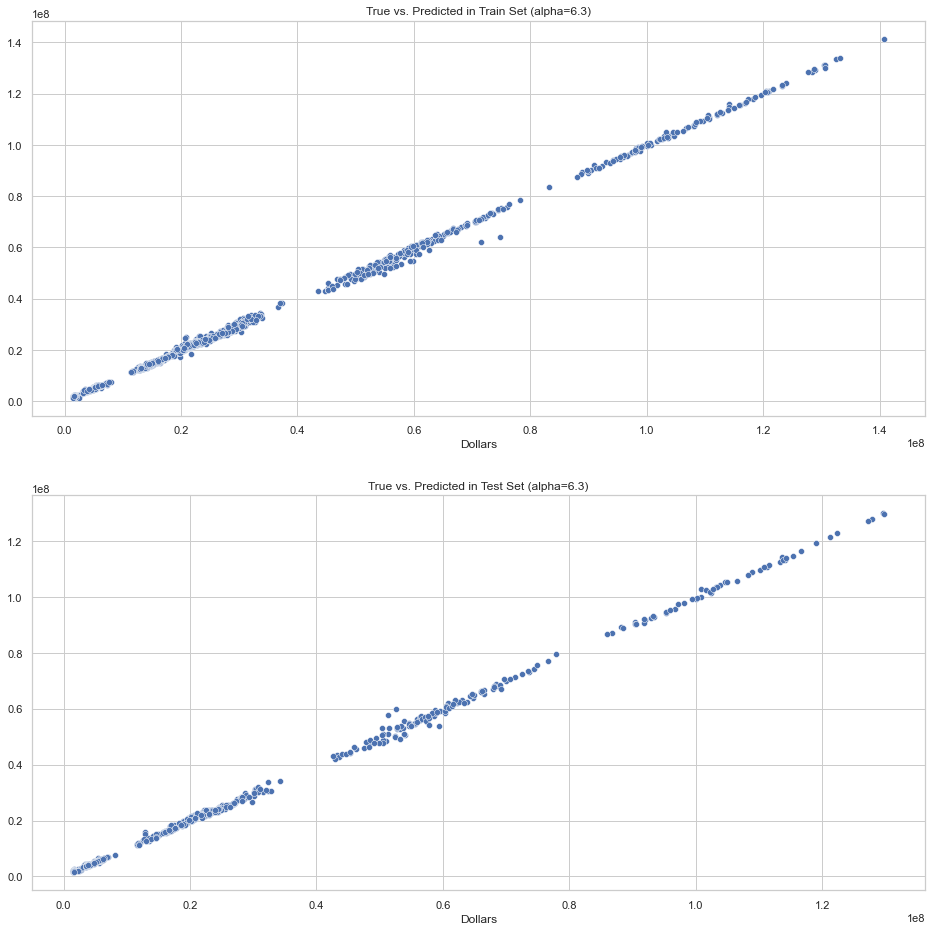

In [132]:
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(16, 16))
sns.set_style('whitegrid')

ax1.set_title('True vs. Predicted in Train Set (alpha=6.3)')
sns.scatterplot(x=y_train, y=KRidge_yhat_train, ax=ax1)

ax2.set_title('True vs. Predicted in Test Set (alpha=6.3)')
sns.scatterplot(x=y_test, y=KRidge_yhat_test, ax=ax2)